# Problem Statement
To predict whether a patient admitted into the hospital would survive or not.

In [103]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 200)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading datasets

In [104]:
datadict = pd.read_csv('Data Dictionary.csv')

In [105]:
print("Data dictionary shape: ",datadict.shape)
datadict.head()

Data dictionary shape:  (188, 6)


Category   Variable Name Unit of Measure Data Type  \
0   identifier    encounter_id            None   integer   
1   identifier     hospital_id            None   integer   
2   identifier      patient_id            None   integer   
3  demographic  hospital_death            None    binary   
4  demographic             age           Years   numeric   

                                         Description Example  
0  Unique identifier associated with a patient un...    None  
1       Unique identifier associated with a hospital    None  
2        Unique identifier associated with a patient    None  
3  Whether the patient died during this hospitali...       0  
4           The age of the patient on unit admission    None

In [106]:
# creating a function to access data dictionary values
def view_datadict(feat, v: str='Description', showidx: bool=False, showcols: bool=False):
    """Function for viewing data dictionary.
    Parameters:
    ----------
    feat: (str) Feature for which information is required
    v: (str) Value of information required
    showidx: (bool: Default=False) Show all values of v
    showcols: (bool: Default=False) Show all values of feat
    """
    tempdict = datadict.set_index(datadict['Variable Name']).drop('Variable Name', axis=1).T
    unit = tempdict.loc["Unit of Measure", feat]
    if showidx:
        print(tempdict.index)
    if showcols:
        print(tempdict.columns)
    return f"{tempdict.loc[v, feat]} in unit: {unit}"

In [212]:
view_datadict('hospital_death')

'Whether the patient died during this hospitalization in unit: None'

In [107]:
# loading dataset
dataset = pd.read_csv('Dataset.csv')
print("Dataset shape: ", dataset.shape)
dataset.head()

Dataset shape:  (91713, 186)


encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache

# Data Information

In [108]:
# defining a function for observing data information
def data_info(df):
    """For displaying dataset summary.
    
    Author: Retin P Kumar
    GitHub: https://github.com/Retinpkumar
    Dated: 04 Dec 2021
    
    Parameters:
    ----------
    df: dataframe
    
    Returns:
    -------
    Column names
    Number of features
    Number of observations
    Data information
    Missing Values
    Duplicates
    Constant features
    Features with less than 0.1 variance
    Information table
    """
    # Column names
    columns = list(df.columns)
    print("="*5, "\033[1m Column Names \033[0m", "="*5)
    print(columns, "\n")
    
    # Numerical column names
    num_cols = [col for col in df if df[col].dtypes in ['int64', 'float64']]
    num_cols_num = len(num_cols)
    print("="*5, "\033[1m Numerical Features \033[0m", "="*5)
    print("No of Numerical features: ", num_cols_num, "\n")
    print(num_cols, "\n")
    
    # Non-numerical column names
    non_num_cols = [col for col in df if col not in num_cols]
    non_num_cols_num = len(non_num_cols)
    print("="*5, "\033[1m Non Numerical Features \033[0m", "="*5)
    print("No of Non-Numerical features: ", non_num_cols_num, "\n")
    print(non_num_cols, "\n")
    
    # Data information
    print("="*10, "\033[1m Dataset Shape \033[0m", "="*10)
    print("No of features: ", df.shape[1])
    print("No of observations: ", df.shape[0], "\n")
    
    # Checking for missing values
    print("="*20, "\033[1m  Checking for Missing values  \033[0m", "="*20)
    total_missing = df.isnull().sum().sum()
    missing_feat = list(df.isnull().columns)
    if total_missing != 0:
        print("Total missing values in the dataset: ", total_missing)
        print("No of features with missing values: ", len(missing_feat), "\n")
        print("Features with missing values: ", missing_feat, "\n")
    else:
        print("No missing values in the dataset")

    # Checking duplicates
    print("="*20, "\033[1m  Checking for duplicates  \033[0m", "="*20)
    print("No of duplicate values in the dataset: ", df.duplicated().sum(), "\n")

    # Checking for constant features
    print("="*20, "\033[1m  Checking for constant features  \033[0m", "="*20)
    total_constants = [col for col in df if df[col].nunique()==1]
    if len(total_constants) != 0:
        print("No of constant features: ", len(total_constants))
        print("Constant features: ", total_constants, "\n")
    else:
        print("No constant features in the dataset")

    # Checking for features with variance < 0.1
    print("="*20, "\033[1m Checking features with low variance (<10%)\033[0m", "="*20)
    low_var=[]
    for col in df:
        try:
            if df[col].var()<0.1:
                low_var.append(col)
        except Exception as e:
            print(f"Couldn't check \033[1m{col}\033[0m. ", e, "\n")

    print("="*20, "\033[1m Features with low variance (<10%)\033[0m", "="*20)
    print("No of features with less than 10% variance: ", len(low_var), "\n")
    print(low_var,"\n")
    #info table
    print("="*10, "\033[1m Information Table \033[0m", "="*10)
    return df.info()

In [109]:
# Checking data info
data_info(dataset)

=====  Column Names  =====
['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 

No of duplicate values in the dataset:  0 

====================   Checking for constant features   ====================
No of constant features:  1
Constant features:  ['readmission_status'] 

====================  Checking features with low variance (<10%) ====================
Couldn't check ethnicity.  could not convert string to float: 'Caucasian' 

Couldn't check gender.  could not convert string to float: 'M' 

Couldn't check hospital_admit_source.  could not convert string to float: 'Floor' 

Couldn't check icu_admit_source.  could not convert string to float: 'Floor' 

Couldn't check icu_stay_type.  could not convert string to float: 'admit' 

Couldn't check icu_type.  could not convert string to float: 'CTICU' 

Couldn't check apache_3j_bodysystem.  could not convert string to float: 'Sepsis' 

Couldn't check apache_2_bodysystem.  could not convert string to float: 'Cardiovascular' 

====================  Features with low variance (<10%) ====================
No of features wi

##### Observations:
* We have missing values on all the features.
* 'readmission_status' is a constant feature.
* There are 19 features with less than 10% variance that must be either dropped or require some sampling to be performed.
* There are 8 features with "Object" datatype that requires further inspection.

In [110]:
# Dropping constant feature "readmission_status"
dataset = dataset.drop(columns=['readmission_status'], axis=1)

In [111]:
# Checking categorical features
dataset.select_dtypes(['object', 'category']).head()

ethnicity gender hospital_admit_source           icu_admit_source  \
0  Caucasian      M                 Floor                      Floor   
1  Caucasian      F                 Floor                      Floor   
2  Caucasian      F  Emergency Department       Accident & Emergency   
3  Caucasian      F        Operating Room  Operating Room / Recovery   
4  Caucasian      M                   NaN       Accident & Emergency   

  icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  
0         admit         CTICU               Sepsis      Cardiovascular  
1         admit  Med-Surg ICU          Respiratory         Respiratory  
2         admit  Med-Surg ICU            Metabolic           Metabolic  
3         admit         CTICU       Cardiovascular      Cardiovascular  
4         admit  Med-Surg ICU               Trauma              Trauma

All the features are categorical and hence we can convert them to category type.

In [112]:
# function for changing dtypes
def change_dtypes(df, fromtype='O', totype='category'):
    """For changing datatypes. By default from "Object" to "Category".
    
    Author: Retin P Kumar
    GitHub: https://github.com/Retinpkumar
    Dated: 04 Dec 2021
    
    Parameters:
    ----------
    df: input dataframe
    fromtype: From datatype
    totype: To datatype
    """
    # Changing dtypes of features with type 'Object'
    for feat in [feat for feat in df.columns if df[feat].dtypes == fromtype]:
        before = df[feat].dtypes
        df[feat] = df[feat]. astype(totype)
        after = df[feat].dtypes
        print(f"Datatype of \033[1m{feat}\033[0m converted from: \033[1m{before}\033[0m to \033[1m{after}\033[0m \n")

In [113]:
# changing dtypes
change_dtypes(dataset)

Datatype of ethnicity converted from: object to category 

Datatype of gender converted from: object to category 

Datatype of hospital_admit_source converted from: object to category 

Datatype of icu_admit_source converted from: object to category 

Datatype of icu_stay_type converted from: object to category 

Datatype of icu_type converted from: object to category 

Datatype of apache_3j_bodysystem converted from: object to category 

Datatype of apache_2_bodysystem converted from: object to category 



In [114]:
# Separating X and y
y = dataset['hospital_death']
X = dataset.drop(columns=['hospital_death'], axis=1)
print(X.shape, y.shape)

(91713, 184) (91713,)


# Feature Information

In [115]:
# Function for observing the target
def view_target_cat(df, target):
    """For observing categorical target composition.
    
    Author: Retin P Kumar
    GitHub: https://github.com/Retinpkumar
    Dated: 04 Dec 2021
    
    Parameters:
    ----------
    df: input dataframe
    target: Target feature
    """
    # Observing the target
    print("\033[1m Target datatype: \033[0m", df[target].dtypes, "\n")
    print("="*20, "\033[1m  Descriptive Stats of Target  \033[0m", "="*20)
    print(pd.DataFrame(df[target]).describe().T.drop('count',axis=1))
    # subplots
    plt.figure(figsize=(10,5))
    # barplot
    ax1 = plt.subplot(1,2,1)
    cp = sns.countplot(x=df[target], palette=['MediumSeaGreen', 'Tomato'])
    ax1.set_xlabel(target, fontsize=14)
    # setting values over barplot
    sizes = []
    for p in cp.patches:
        height = p.get_height()
        sizes.append(height)
        cp.text(p.get_x() + p.get_width()/2, 
                height + 1000,
                '{}'.format(height),
                ha='center',
                fontsize=14)
    sns.despine(top=True, right=True)
    # pieplot
    ax2 = plt.subplot(1,2,2)
    plt.pie(df[target].value_counts(),
            labels=list(df[target].unique()),
            colors=['MediumSeaGreen', 'Tomato'],
            autopct='%2.2f%%', 
            explode=(0.2,0),
            shadow=True,
            textprops={'fontsize':14}
           )
    ax2.set_xlabel(target, fontsize=14)
    plt.tight_layout()

 Target datatype:  int64 

====================   Descriptive Stats of Target   ====================
                    mean       std  min  25%  50%  75%  max
hospital_death  0.086302  0.280811  0.0  0.0  0.0  0.0  1.0


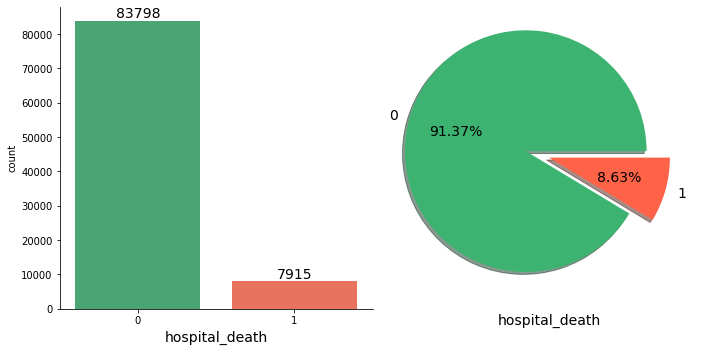

In [116]:
# Observing the target
view_target_cat(dataset, 'hospital_death')

##### Mean hospital death amounts to 86 per 1000 patients with a deviation of 281 per 1000 patients
* Target is highly imbalanced and requires some sort of sampling procedures to be performed.

### Predictor features

In [117]:
# Extracting numerical features
numfeat = dataset.select_dtypes(['int64', 'float64']).columns
numfeat

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days',
       ...
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=177)

In [118]:
# Extracting discrete numerical features
discfeat = [feat for feat in numfeat if dataset[feat].nunique()<25]
discfeat

['hospital_death',
 'elective_surgery',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

In [119]:
# Extracting continuous numerical features
contfeat = [feat for feat in numfeat if feat not in discfeat]
contfeat

['encounter_id',
 'patient_id',
 'hospital_id',
 'age',
 'bmi',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvas

In [120]:
# Extracting categorical features
catfeat = dataset.select_dtypes(['category', 'object']).columns
catfeat

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [121]:
# continuous numerical dataset
dnum = dataset[contfeat]
print(dnum.shape)
dnum.head()

(91713, 159)


encounter_id  patient_id  hospital_id   age    bmi  height  icu_id  \
0         66154       25312          118  68.0  22.73   180.3      92   
1        114252       59342           81  77.0  27.42   160.0      90   
2        119783       50777          118  25.0  31.95   172.7      93   
3         79267       46918          118  81.0  22.64   165.1      92   
4         92056       34377           33  19.0    NaN   188.0      91   

   pre_icu_los_days  weight  albumin_apache  apache_2_diagnosis  \
0          0.541667    73.9             2.3               113.0   
1          0.927778    70.2             NaN               108.0   
2          0.000694    95.3             NaN               122.0   
3          0.000694    61.7             NaN               203.0   
4          0.073611     NaN             NaN               119.0   

   apache_3j_diagnosis  bilirubin_apache  bun_apache  creatinine_apache  \
0               502.01               0.4        31.0               2.51   
1               203.01               NaN         9.0               0.56   
2               703.03               NaN         NaN                NaN   
3              1206.03               NaN         NaN                NaN   
4               601.01               NaN         NaN                NaN   

   fio2_apache  glucose_apache  heart_rate_apache  hematocrit_apache  \
0          NaN           168.0              118.0               27.4   
1          1.0           145.0              120.0               36.9   
2          NaN             NaN              102.0                NaN   
3          0.6           185.0              114.0               25.9   
4          NaN             NaN               60.0                NaN   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache  urineoutput_apache  \
0             36.0          134.0         39.3                 NaN   
1             33.0          145.0         35.1                 NaN   
2             37.0            NaN         36.7                 NaN   
3              4.0            NaN         34.8                 NaN   
4             16.0            NaN         36.7                 NaN   

   wbc_apache  d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_diasbp_max  \
0        14.1                    46.0                    32.0           68.0   
1        12.7                     NaN                     NaN           95.0   
2         NaN                     NaN                     NaN           88.0   
3         8.0                    62.0                    30.0           48.0   
4         NaN                     NaN                     NaN           99.0   

   d1_diasbp_min  d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  \
0           37.0                       68.0                       37.0   
1           31.0                       95.0                       31.0   
2           48.0                       88.0                       48.0   
3           42.0                       48.0                       42.0   
4           57.0                       99.0                       57.0   

   d1_heartrate_max  d1_heartrate_min  d1_mbp_invasive_max  \
0             119.0              72.0                 66.0   
1             118.0              72.0                  NaN   
2              96.0              68.0                  NaN   
3             116.0              92.0                 92.0   
4              89.0              60.0                  NaN   

   d1_mbp_invasive_min  d1_mbp_max  d1_mbp_min  d1_mbp_noninvasive_max  \
0                 40.0    

In [122]:
# discrete dataset
ddis = dataset[discfeat]
print(ddis.shape)
ddis.head()

(91713, 18)


hospital_death  elective_surgery  apache_post_operative  arf_apache  \
0               0                 0                      0         0.0   
1               0                 0                      0         0.0   
2               0                 0                      0         0.0   
3               0                 1                      1         0.0   
4               0                 0                      0         0.0   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   intubated_apache  ventilated_apache  aids  cirrhosis  diabetes_mellitus  \
0               0.0                0.0   0.0        0.0                1.0   
1               0.0                1.0   0.0        0.0                1.0   
2               0.0                0.0   0.0        0.0                0.0   
3               1.0                1.0   0.0        0.0                0.0   
4               0.0                0.0   0.0        0.0                0.0   

   hepatic_failure  immunosuppression  leukemia  lymphoma  \
0              0.0                0.0       0.0       0.0   
1              0.0                0.0       0.0       0.0   
2              0.0                0.0       0.0       0.0   
3              0.0                0.0       0.0       0.0   
4              0.0                0.0       0.0       0.0   

   solid_tumor_with_metastasis  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0

In [123]:
# categorical dataset
dcat = dataset[catfeat]
print(dcat.shape)
dcat.head()

(91713, 8)


ethnicity gender hospital_admit_source           icu_admit_source  \
0  Caucasian      M                 Floor                      Floor   
1  Caucasian      F                 Floor                      Floor   
2  Caucasian      F  Emergency Department       Accident & Emergency   
3  Caucasian      F        Operating Room  Operating Room / Recovery   
4  Caucasian      M                   NaN       Accident & Emergency   

  icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  
0         admit         CTICU               Sepsis      Cardiovascular  
1         admit  Med-Surg ICU          Respiratory         Respiratory  
2         admit  Med-Surg ICU            Metabolic           Metabolic  
3         admit         CTICU       Cardiovascular      Cardiovascular  
4         admit  Med-Surg ICU               Trauma              Trauma

#### Merging all discrete features with categorical dataframe

In [124]:
# checking discrete feature dtypes
ddis.dtypes

hospital_death                   int64
elective_surgery                 int64
apache_post_operative            int64
arf_apache                     float64
gcs_eyes_apache                float64
gcs_motor_apache               float64
gcs_unable_apache              float64
gcs_verbal_apache              float64
intubated_apache               float64
ventilated_apache              float64
aids                           float64
cirrhosis                      float64
diabetes_mellitus              float64
hepatic_failure                float64
immunosuppression              float64
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
dtype: object

In [125]:
# Merging all discrete features to categorical type
dcat = pd.concat([dcat, ddis], axis=1)
dcat.head()

ethnicity gender hospital_admit_source           icu_admit_source  \
0  Caucasian      M                 Floor                      Floor   
1  Caucasian      F                 Floor                      Floor   
2  Caucasian      F  Emergency Department       Accident & Emergency   
3  Caucasian      F        Operating Room  Operating Room / Recovery   
4  Caucasian      M                   NaN       Accident & Emergency   

  icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  \
0         admit         CTICU               Sepsis      Cardiovascular   
1         admit  Med-Surg ICU          Respiratory         Respiratory   
2         admit  Med-Surg ICU            Metabolic           Metabolic   
3         admit         CTICU       Cardiovascular      Cardiovascular   
4         admit  Med-Surg ICU               Trauma              Trauma   

   hospital_death  elective_surgery  apache_post_operative  arf_apache  \
0               0                 0                      0         0.0   
1               0                 0                      0         0.0   
2               0                 0                      0         0.0   
3               0                 1                      1         0.0   
4               0                 0                      0         0.0   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   intubated_apache  ventilated_apache  aids  cirrhosis  diabetes_mellitus  \
0               0.0                0.0   0.0        0.0                1.0   
1               0.0                1.0   0.0        0.0                1.0   
2               0.0                0.0   0.0        0.0                0.0   
3               1.0                1.0   0.0        0.0                0.0   
4               0.0                0.0   0.0        0.0                0.0   

   hepatic_failure  immunosuppression  leukemia  lymphoma  \
0              0.0                0.0       0.0       0.0   
1              0.0                0.0       0.0       0.0   
2              0.0                0.0       0.0       0.0   
3              0.0                0.0       0.0       0.0   
4              0.0                0.0       0.0       0.0   

   solid_tumor_with_metastasis  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0

In [126]:
# changing 'int64' discrete features to type 'categorical'
change_dtypes(dcat, "int64", "category")

Datatype of hospital_death converted from: int64 to category 

Datatype of elective_surgery converted from: int64 to category 

Datatype of apache_post_operative converted from: int64 to category 



In [127]:
# changing 'float64' discrete features to type 'categorical'
change_dtypes(dcat, "float64", "category")

Datatype of arf_apache converted from: float64 to category 

Datatype of gcs_eyes_apache converted from: float64 to category 

Datatype of gcs_motor_apache converted from: float64 to category 

Datatype of gcs_unable_apache converted from: float64 to category 

Datatype of gcs_verbal_apache converted from: float64 to category 

Datatype of intubated_apache converted from: float64 to category 

Datatype of ventilated_apache converted from: float64 to category 

Datatype of aids converted from: float64 to category 

Datatype of cirrhosis converted from: float64 to category 

Datatype of diabetes_mellitus converted from: float64 to category 

Datatype of hepatic_failure converted from: float64 to category 

Datatype of immunosuppression converted from: float64 to category 

Datatype of leukemia converted from: float64 to category 

Datatype of lymphoma converted from: float64 to category 

Datatype of solid_tumor_with_metastasis converted from: float64 to category 



In [128]:
# Lets create X and y
X = pd.concat([dnum, dcat], axis=1).drop(columns=['hospital_death'], axis=1)
y = dcat['hospital_death']
print(X.shape, y.shape)

(91713, 184) (91713,)


# Numerical feature analysis

In [129]:
dnum.describe()

encounter_id     patient_id   hospital_id           age           bmi  \
count   91713.000000   91713.000000  91713.000000  87485.000000  88284.000000   
mean    65606.079280   65537.131464    105.669262     62.309516     29.185818   
std     37795.088538   37811.252183     62.854406     16.775119      8.275142   
min         1.000000       1.000000      2.000000     16.000000     14.844926   
25%     32852.000000   32830.000000     47.000000     52.000000     23.641975   
50%     65665.000000   65413.000000    109.000000     65.000000     27.654655   
75%     98342.000000   98298.000000    161.000000     75.000000     32.930206   
max    131051.000000  131051.000000    204.000000     89.000000     67.814990   

             height        icu_id  pre_icu_los_days        weight  \
count  90379.000000  91713.000000      91713.000000  88993.000000   
mean     169.641588    508.357692          0.835766     84.028340   
std       10.795378    228.989661          2.487756     25.011497   
min      137.200000     82.000000        -24.947222     38.600000   
25%      162.500000    369.000000          0.035417     66.800000   
50%      170.100000    504.000000          0.138889     80.300000   
75%      177.800000    679.000000          0.409028     97.100000   
max      195.590000    927.000000        159.090972    186.000000   

       albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
count    37334.000000        90051.000000         90612.000000   
mean         2.902968          185.401739           558.216377   
std          0.681863           86.050882           463.266985   
min          1.200000          101.000000             0.010000   
25%          2.400000          113.000000           203.010000   
50%          2.900000          122.000000           409.020000   
75%          3.400000          301.000000           703.030000   
max          4.600000          308.000000          2201.050000   

       bilirubin_apache   bun_apache  creatinine_apache   fio2_apache  \
count      33579.000000  72451.00000       72860.000000  20845.000000   
mean           1.147721     25.82533           1.480014      0.595751   
std            2.165538     20.67298           1.525787      0.263238   
min            0.100000      4.00000           0.300000      0.210000   
25%            0.400000     13.00000           0.720000      0.400000   
50%            0.600000     19.00000           0.980000      0.500000   
75%            1.100000     32.00000           1.530000      0.850000   
max           51.000000    127.00000          11.180000      1.000000   

       glucose_apache  heart_rate_apache  hematocrit_apache    map_apache  \
count    80677.000000       90835.000000       71835.000000  90719.000000   
mean       160.326822          99.707932          32.988739     88.015873   
std         90.790551          30.870502           6.873585     42.032412   
min         39.000000          30.000000          16.200000     40.000000   
25%         97.000000          86.000000          28.000000     54.000000   
50%        133.000000         104.000000          33.200000     67.000000   
75%        196.000000         120.000000          37.900000    125.000000   
max        598.700000         178.000000          51.400000    200.000000   

       paco2_apache  paco2_for_ph_apache   pao2_apache     ph_apache  \
count  20845.000000         20845.000000  20845.000000  20845.000000   
mean      42.183238            42.183238    131.148467      7.353895   
std       12.382412            12.382412     83.607292      0.097755   
min       18.000000            18.000000     31.000000      6.960540   
25%       34.400000            34.400000     77.500000      7.308000   
50%       40.000000            40.000000    103.500000      7.360000   
75%       47.000000            47.000000    153.000000      7.419000   
max       95.000000            95.000000    498.000000      7.590000   

       resprate_apache  sodium_apache   temp_apache  urineou

##### Observations:
* Most of the patients are more than 50yrs old with an average age of 62.
* Average BMI of patients is around 29
* Average height and weight of all patients is around:  169cm and 84kg

In [130]:
# function for viewing numerical features
def plot_num(df, size=(15,6), layout=(2,4)):
    """For plotting numerical features distribution.
    
    Author: Retin P Kumar
    GitHub: https://github.com/Retinpkumar
    Dated: 04 Dec 2021
    
    Parameters:
    ----------
    df: input dataframe
    size: plot size
    layout: plot layout in (rows, columns)
    
    Returns:
    --------
    Plot of numerical feature distribution.
    """
    # Density plots of numerical data
    df.plot(kind='kde', 
            subplots=True, 
            layout=layout, 
            sharex=False,
            figsize=size,
            title=list(df.columns),
            legend=False)
    plt.tight_layout()

Wall time: 3min 23s


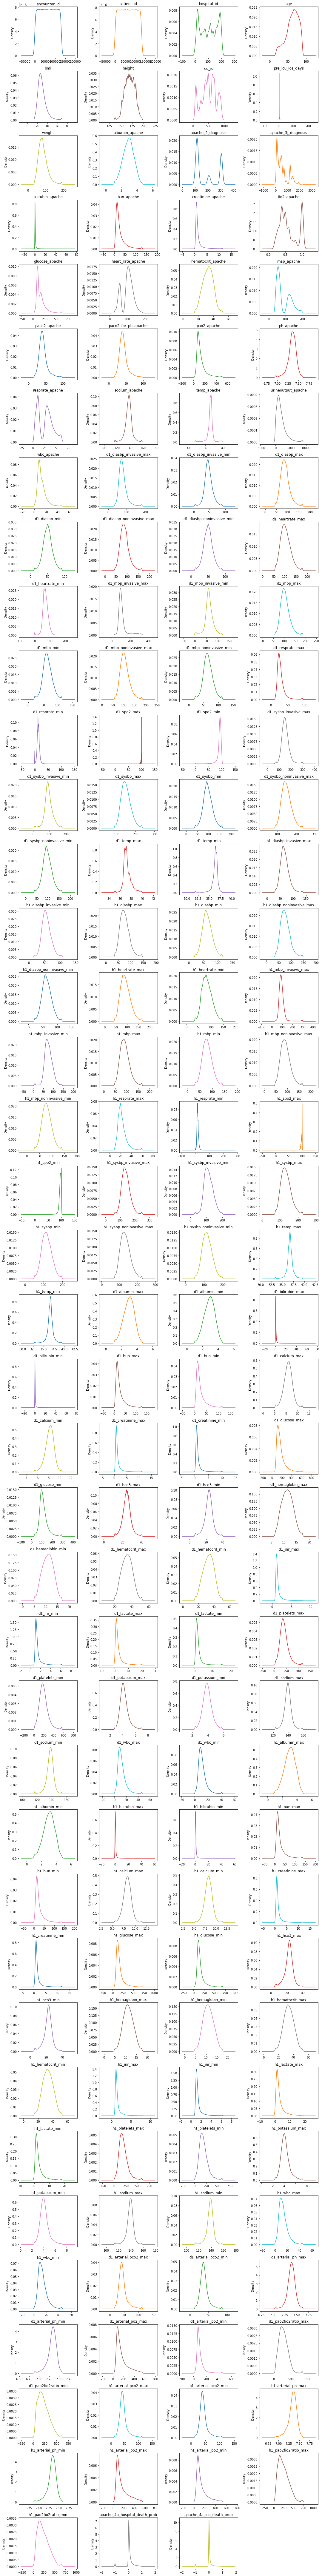

In [131]:
%%time
# plotting numerical features
plot_num(dnum, size=(15,120), layout=(40,4))

##### Observations:
* Most of the patients are aged between 60 and 80
* Average BMI of most patients are around 30.
* Most patients are between 160 and 180 cm in height.
* Most patients have weights less than 100kg though some people with wights near 200kg can also be observed.
* 'apache_4a_hospital_death_prob' and 'apache_4a_icu_death_prob' seems highly correlated.
* Though most features are unimodal and show good normal distribution pattern, some features with bimodal distribution and skewed distribution can be observed.

In [132]:
# function for plotting numerical features against categorical target
def plot_xnum_ycat(df, target, plottype, alpha=0.35, size=(15,120), ticksize=13, titlesize=15):
    """For plotting numerical features against categorical target
    
    Author: Retin P Kumar
    GitHub: https://github.com/Retinpkumar
    Dated: 04 Dec 2021
    
    Parameters:
    ----------
    df: input dataframe
    target: categorical target feature
    plottype: type of plot (default: 'box'), 'kde'
    alpha: opacity
    size: plot size
    ticksize: plot tick size
    titlesize: plot title size
    
    Returns:
    --------
    Plot of numerical feature relation wrt categorical target
    """
    plt.figure(figsize=size)
    plotnumber=1

    for col in df:
        if plotnumber < len(df.columns):
            ax = plt.subplot(40,4,plotnumber)
            if plottype == 'kde':
                sns.kdeplot(data=df, x=col, hue=target, shade=True, palette='Set2')
                plt.xlabel('')
                plt.ylabel('')
                plt.title(col, fontsize=titlesize)
            elif plottype == 'box':
                sns.boxplot(data=df, x=target, y=df[col], palette='Set2')
                plt.xlabel(str(target.name), fontsize=12)
                plt.ylabel(str(col), fontsize=12)
        plotnumber +=1
    plt.tight_layout()

Wall time: 36.5 s


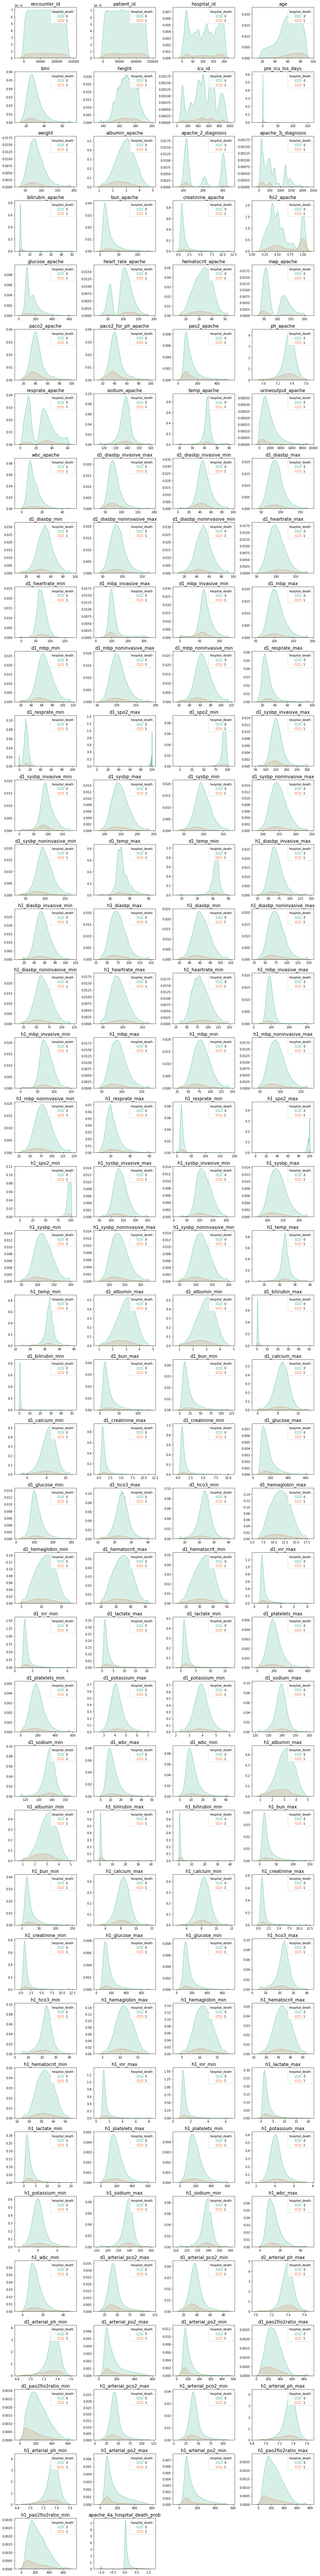

In [133]:
%%time
# plotting kde plot
plot_xnum_ycat(dnum, target=y, plottype='kde')

Wall time: 9.76 s


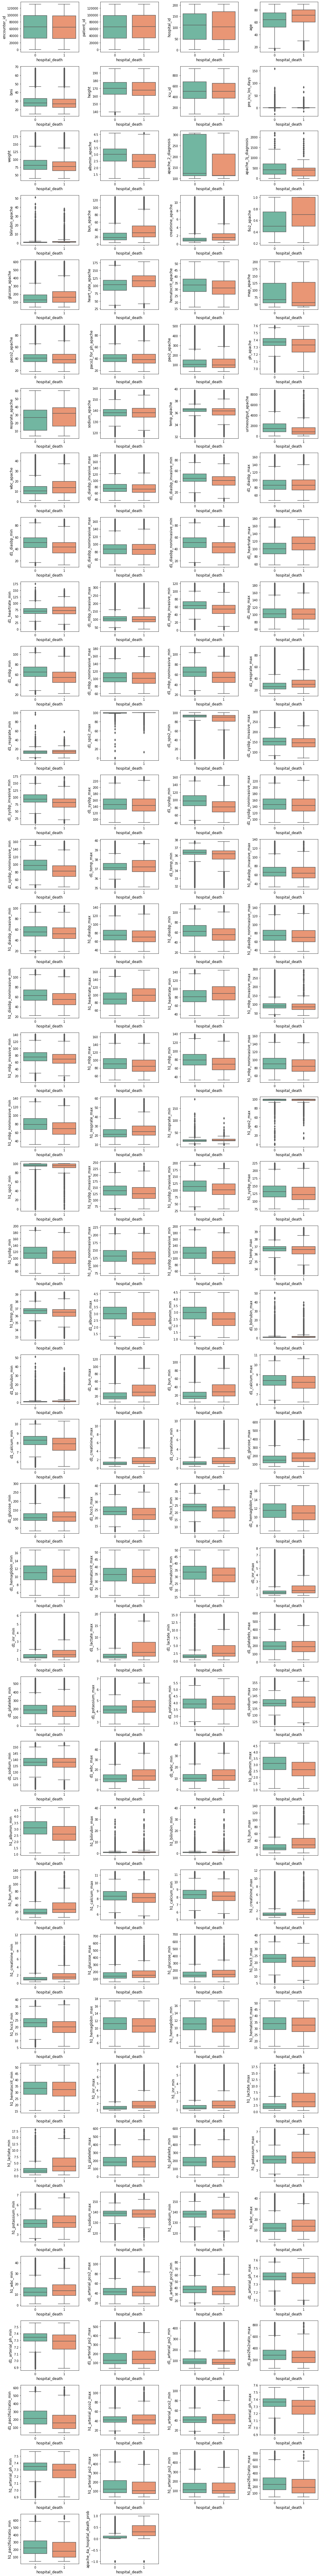

In [134]:
%%time
# plotting box plot
plot_xnum_ycat(dnum, target=y, plottype='box') 

In [135]:
# creating a function for viewing quick summary of numerical features
def quickviewnum(feat, setlimit=False, xl=(0,0)):
    print("\033[1m Feature Description \033[0m \n","="*20,"\n", view_datadict(feat))
    sns.kdeplot(dnum[feat], hue=dcat['hospital_death'], shade=True, palette='Set2')
    if setlimit:
        plt.xlim(xl[0], xl[1])
    plt.show()

 Feature Description  
 The length of stay of the patient between hospital admission and unit admission in unit: Days


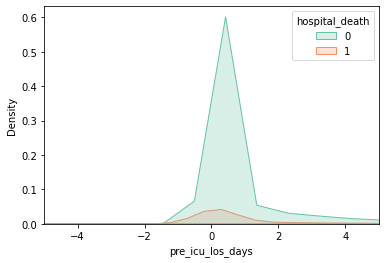

In [136]:
quickviewnum('pre_icu_los_days', True, (-5,5))

##### Some key Observations:
* Hospital death rate increases from 40 to 80 yrs of **age** and is at its peak for people aged 80 to 90
* Patients with **BMI** between 20 and 30 are more likely to die.
* Hospital death rate increases for people having **heights** from 140 to 170 cm and thereafter drops. Peak deaths are observerd for people of height around 165cm.
* More deaths are observed for **ICU ID** 500 to 700
* Patients who died stayed only for less than 24hrs between hospital and unit admission. This might indicate that most of the patient deaths are due to emergency cases.
* Most of the patients who died had **weights** ranging from 60 to 80kg with peak number of patients having around 70kg.

In [137]:
# function for extracting skewed features
def outliers(df):
    """For extracting skewed features and outlier data.
    
    Author: Retin P Kumar
    GitHub: https://github.com/Retinpkumar
    Dated: 04 Dec 2021
    
    Parameters:
    ----------
    df: input numerical dataframe
    
    Returns:
    --------
    Positively skewed features
    Negatively skewed features
    Total skewed features
    """
    # Separating positively and negatively skewed features
    # Keeping a threshold of skewness=0.7 for identifying positively and negatively skewed features
    positively_skewed = [feat for feat in df.columns if df[feat].skew()>0.7]
    negatively_skewed = [feat for feat in df.columns if df[feat].skew()<-0.7]
    print("\033[1m Positively skewed features: \033[0m\n", positively_skewed)
    print("\n\033[1m Negatively skewed features: \033[0m\n",negatively_skewed,"\n")
    # Checking for outliers
    skewed_features = positively_skewed + negatively_skewed

    outlier_dict={}

    for feat in df.columns:
        if feat in skewed_features:
            # Applying IQR for identifying outliers for skewed features
            q1 = df[feat].quantile(0.25)
            q3 = df[feat].quantile(0.75)
            iqr = q3 - q1
            upper = q3+(1.5*iqr)
            lower = q1-(1.5*iqr)
            outlier_count = np.sum(df[feat]>upper)+np.sum(df[feat]<lower)
        else:
            # Applying 3 standard deviations for normally distributed features
            feat_mean = np.mean(df[feat])
            feat_stdev = np.std(df[feat])
            upper = feat_mean+(3*feat_stdev)
            lower = feat_mean-(3*feat_stdev)
            outlier_count = np.sum(df[feat]>upper)+np.sum(df[feat]<lower)
        outlier_dict[feat]=outlier_count

    for feat,count in outlier_dict.items():
        print("Outliers in \033[1m'{}'\033[0m: {} %".format(feat, (count*100/df.shape[0]).round(2)))
        
    return positively_skewed, negatively_skewed, skewed_features

In [138]:
# extracting skewed features
pos_skew, neg_skew, total_skew = outliers(dnum)

 Positively skewed features: 
 ['bmi', 'pre_icu_los_days', 'weight', 'apache_3j_diagnosis', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'glucose_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'urineoutput_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_max', 'd1_diasbp_noninvasive_max', 'd1_mbp_invasive_max', 'd1_mbp_max', 'd1_mbp_noninvasive_max', 'd1_resprate_max', 'd1_sysbp_invasive_max', 'd1_temp_max', 'h1_diasbp_invasive_max', 'h1_mbp_invasive_max', 'h1_resprate_max', 'h1_resprate_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max', 'd1_wbc_max', 'd1_wbc_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_inr_max', 'h1_in

In [139]:
# plotting box plots
def boxplots(df, size=(15,3), layout=(2,4)):
    """For plotting numerical feature distribution boxplot.
    
    Author: Retin P Kumar
    GitHub: https://github.com/Retinpkumar
    Dated: 04 Dec 2021
    
    Parameters:
    ----------
    df: input dataframe
    size: plot size
    layout: plot layout in (rows, columns)
    
    Returns:
    --------
    Plot of numerical feature distribution.
    """
    # Visualizing outliers
    plt.figure(figsize=size, facecolor='white')
    plotnumber = 1

    for col in df:
        if plotnumber<= len(df.columns):
            ax1 = plt.subplot(layout[0], layout[1], plotnumber)
            sns.boxplot(x=df[col], palette='Set2')
            plt.xticks(fontsize=13)
            plt.yticks(fontsize=13)
            plt.xlabel(col,fontsize=15)
            plt.ylabel(' ',fontsize=15)
        plotnumber+=1
    plt.tight_layout()

Wall time: 5.13 s


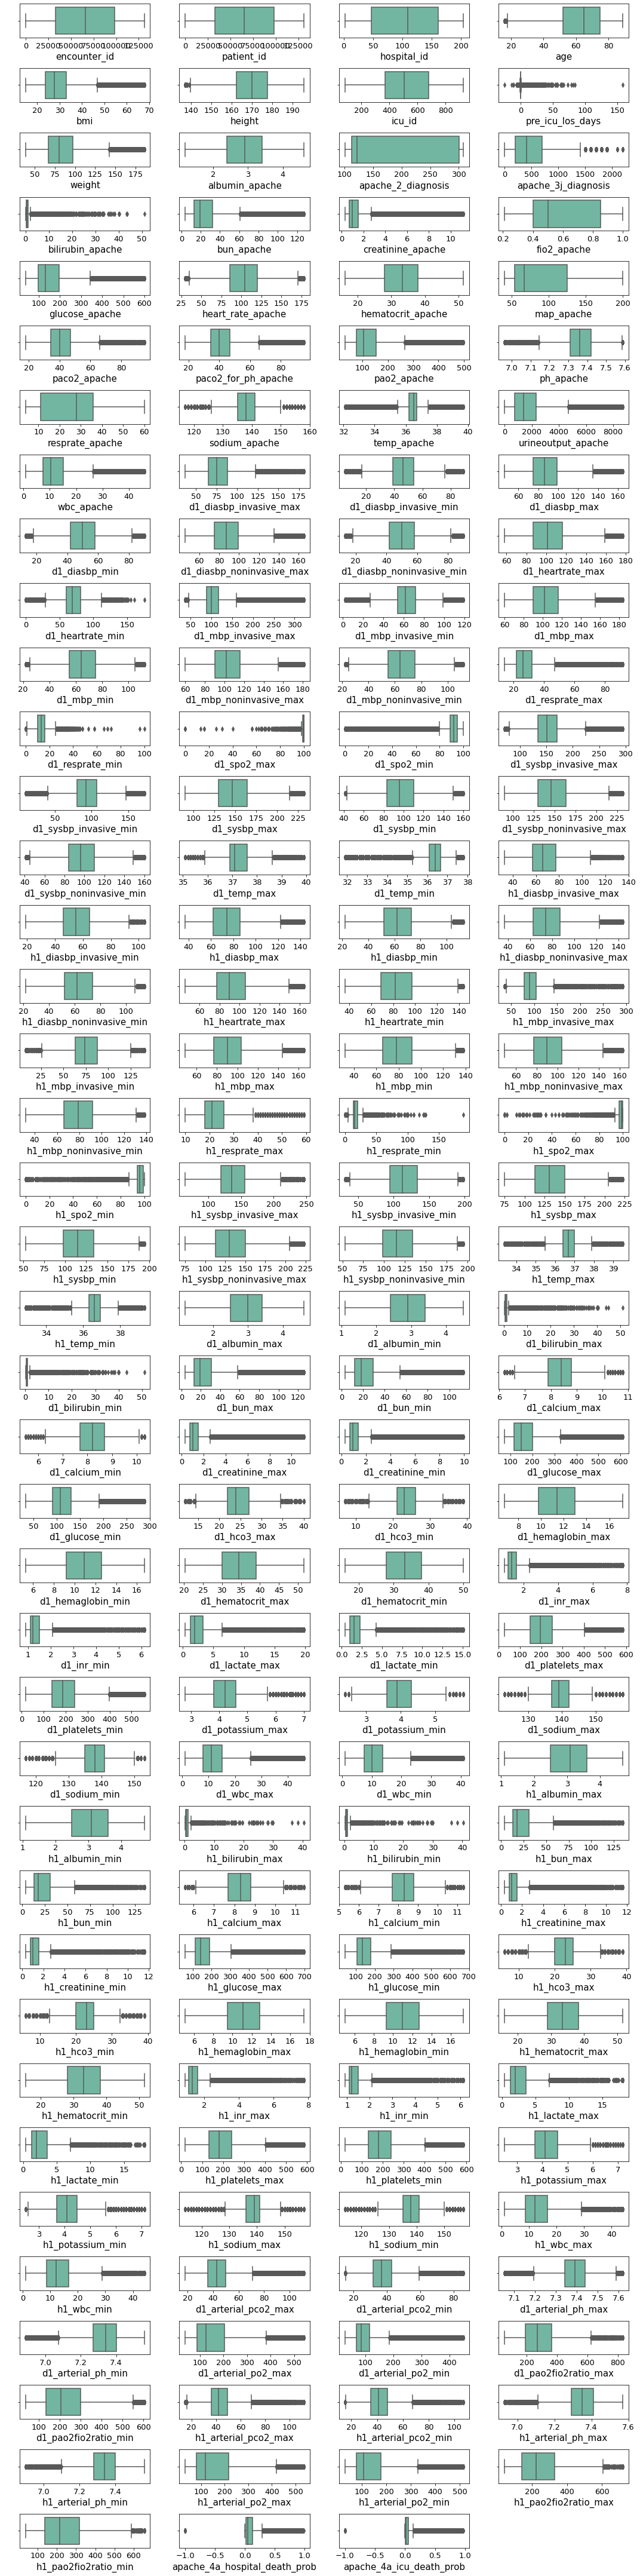

In [140]:
%%time
# plotting boxplots
boxplots(dnum, size=(15, 60), layout=(40,4), )

# Categorical Features

In [141]:
dcat.describe()

ethnicity gender hospital_admit_source      icu_admit_source  \
count       90318  91688                 70304                 91601   
unique          6      2                    15                     5   
top     Caucasian      M  Emergency Department  Accident & Emergency   
freq        70684  49469                 36962                 54060   

       icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  \
count          91713         91713                90051               90051   
unique             3             8                   11                  10   
top            admit  Med-Surg ICU       Cardiovascular      Cardiovascular   
freq           86183         50586                29999               38816   

        hospital_death  elective_surgery  apache_post_operative  arf_apache  \
count            91713             91713                  91713     90998.0   
unique               2                 2                      2         2.0   
top                  0                 0                      0         0.0   
freq             83798             74862                  73269     88452.0   

        gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
count           89812.0           89812.0            90676.0   
unique              4.0               6.0                2.0   
top                 4.0               6.0                0.0   
freq            62995.0           70960.0            89812.0   

        gcs_verbal_apache  intubated_apache  ventilated_apache     aids  \
count             89812.0           90998.0            90998.0  90998.0   
unique                5.0               2.0                2.0      2.0   
top                   5.0               0.0                0.0      0.0   
freq              56909.0           77237.0            61358.0  90920.0   

        cirrhosis  diabetes_mellitus  hepatic_failure  immunosuppression  \
count     90998.0            90998.0          90998.0            90998.0   
unique        2.0                2.0              2.0                2.0   
top           0.0                0.0              0.0                0.0   
freq      89570.0            70506.0          89816.0            88617.0   

        leukemia  lymphoma  solid_tumor_with_metastasis  
count    90998.0   90998.0                      90998.0  
unique       2.0       2.0                          2.0  
top          0.0       0.0                          0.0  
freq     90355.0   90622.0                      89120.0

In [142]:
view_datadict('hospital_death')

'Whether the patient died during this hospitalization in unit: None'

##### Observations:
* Most of the patients are males and of Caucasian origin.
* Most of the hospital admissions are from Emergency department.

In [143]:
# function for plotting categorical features
def plot_cat(df, size=(20,20), ticksize=13, titlesize=18):
    """For plotting categorical features composition.
    
    Author: Retin P Kumar
    GitHub: https://github.com/Retinpkumar
    Dated: 04 Dec 2021
    
    Parameters:
    ----------
    df: input dataframe
    size: plot size
    ticksize: plot tick size
    titlesize: plot title size
    
    Returns:
    --------
    Plot of categorical feature composition
    """
    # Plotting Categorical features distribution
    plt.figure(figsize=size)
    plotnumber = 1

    for col in df:
        if plotnumber < 13:
            ax1 = plt.subplot(5,3,plotnumber)
            sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="Set2")
            plt.xticks(fontsize=ticksize, rotation=45)
            plt.yticks(fontsize=ticksize)
            plt.title(f"{col}", fontsize=titlesize)
            plt.xlabel('')
            plt.ylabel('')
        plotnumber +=1
    plt.tight_layout()

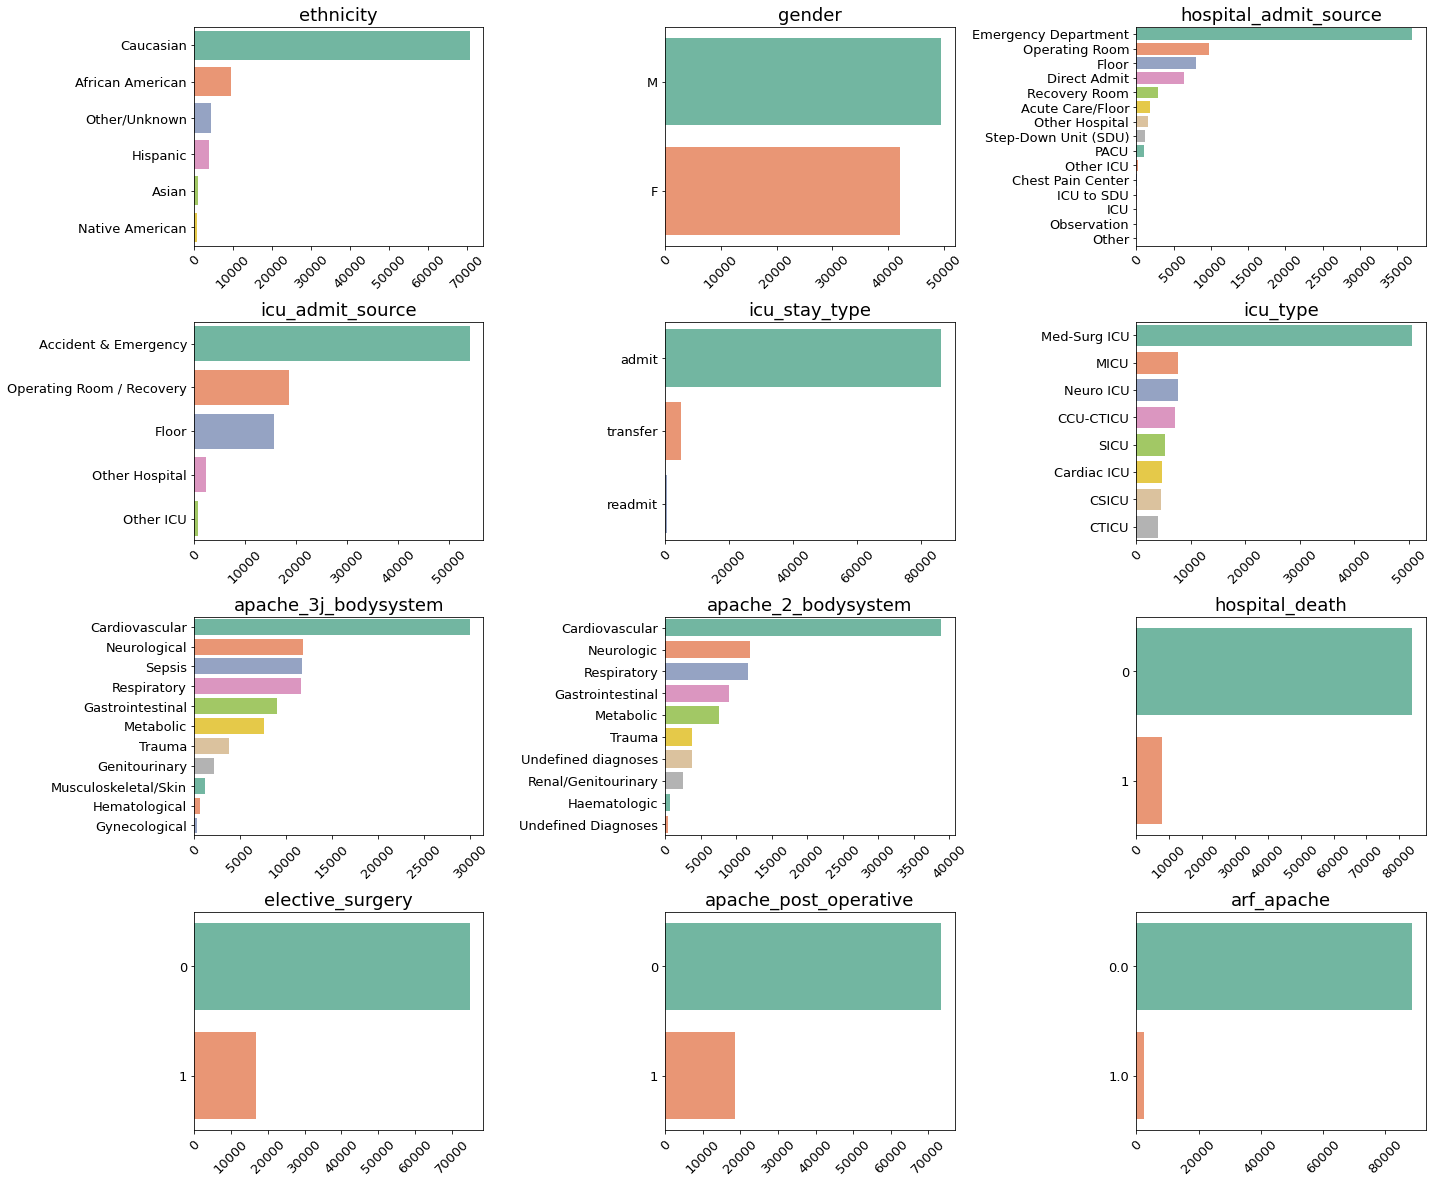

In [144]:
plot_cat(dcat)

##### Observations:
* Most of the patients are of "Caucasian" in origin.
* Majority of the patients are males (more than 10,000 wrt female count)
* Majority of the patients were admitted from "Emergency department", followed by patients from "Operating Room".
* Majority of the ICU admits are due to accident and emergency followed by patients from "Operating Room".

## plotting categorical features against target

In [145]:
def plot_xcat_ycat(df, target, size=(20,30), ticksize=13, titlesize=18):
    """For plotting categorical features against categorical target.
    
    Author: Retin P Kumar
    GitHub: https://github.com/Retinpkumar
    Dated: 04 Dec 2021
    
    Parameters:
    ----------
    df: input dataframe
    target: target feature
    size: plot size
    ticksize: plot tick size
    titlesize: plot title size
    
    Returns:
    --------
    Plot of categorical feature composition
    """
    # Plotting Categorical features distribution
    plt.figure(figsize=size)
    plotnumber = 1

    for col in df:
        if plotnumber < 24:
            ax1 = plt.subplot(6,4,plotnumber)
            sns.countplot(data=df, x=col, hue=target, palette='Set2')
            plt.xticks(fontsize=ticksize, rotation=45)
            plt.yticks(fontsize=ticksize)
            plt.title(f"{col}", fontsize=titlesize)
            plt.xlabel('')
            plt.ylabel('')
        plotnumber +=1
    plt.tight_layout()

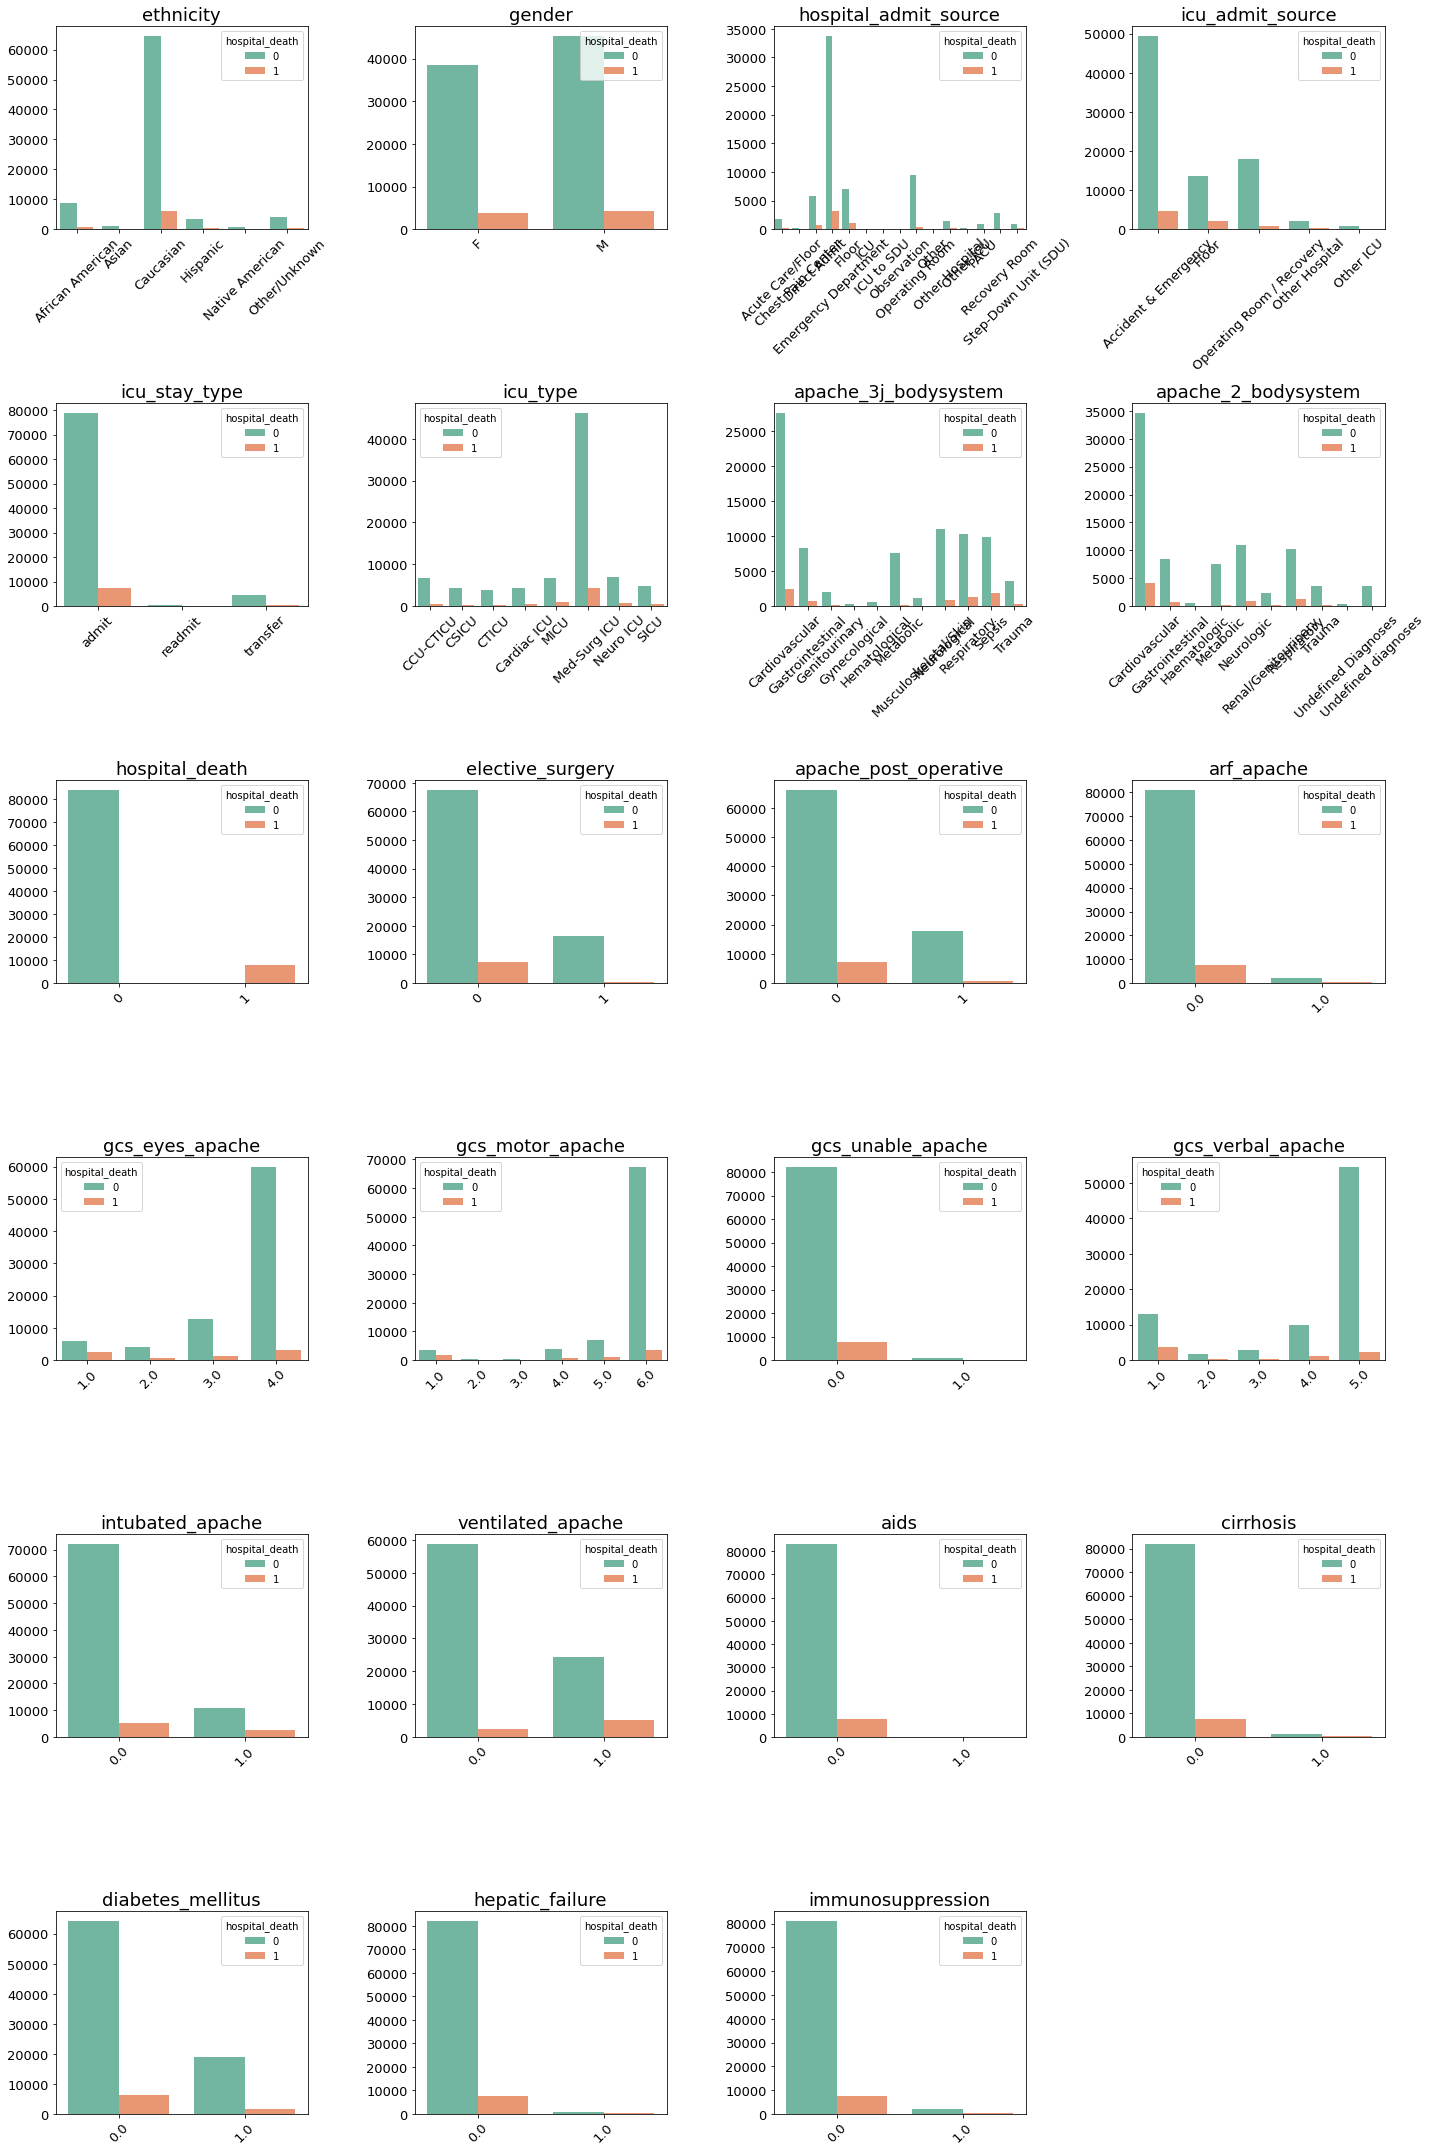

In [146]:
plot_xcat_ycat(dcat, target=y)

In [147]:
# creating a function for viewing quick summary of categorical features
def quickviewcat(feat, setlimit=False, xl=(0,0)):
    print("\033[1m Feature Description \033[0m \n","="*20,"\n", view_datadict(feat))
    g = sns.FacetGrid(data=dcat, col='hospital_death', height=3)
    g.map(sns.countplot, feat, palette='Set2')
    if setlimit:
        plt.xlim(xl[0], xl[1])

 Feature Description  
 The genotypical sex of the patient in unit: None


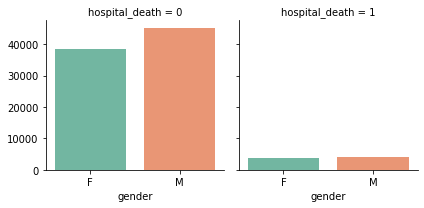

In [148]:
quickviewcat('gender')

# Handling Missing Values

(91713, 184)


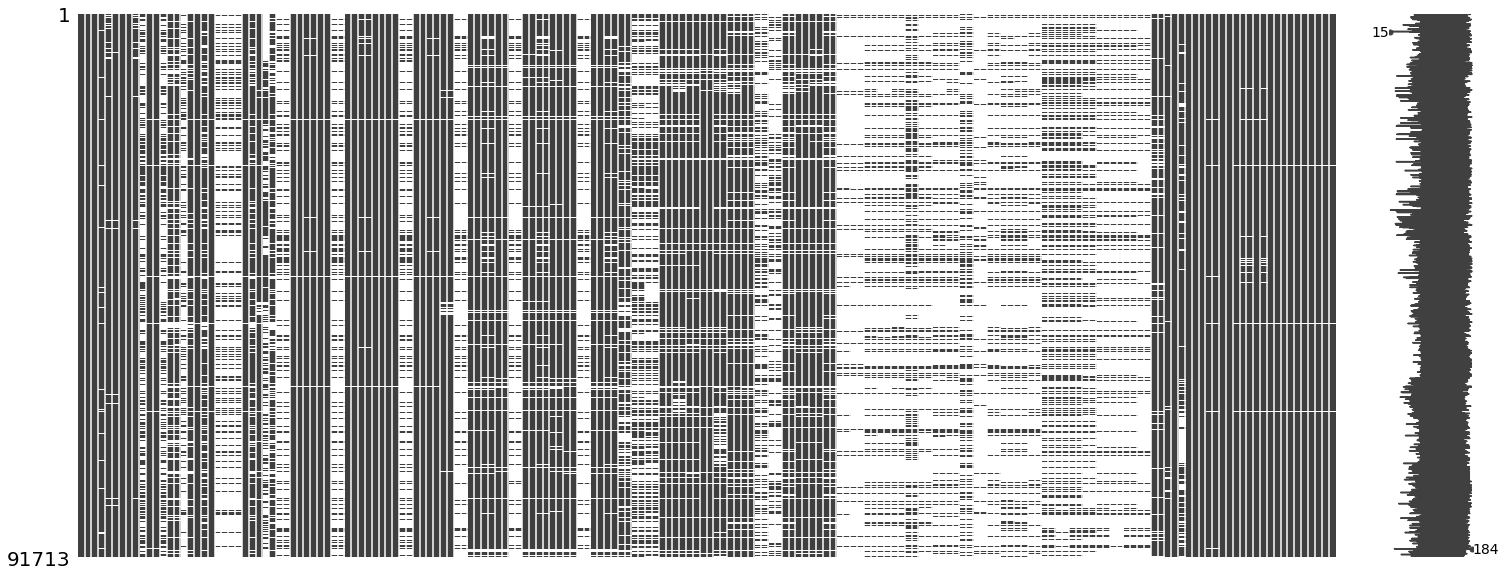

In [149]:
# checking missing values
import missingno as msno

# creating a dataframe of missing values
Xmiss = X[X.isnull().columns]

print(Xmiss.shape)

msno.matrix(Xmiss);

There are multiple features with huge number of missing values. We will drop those feature with more than 50% missing values.

In [150]:
# dropping features with more than 50% missing values
thresh = len(Xmiss)*0.5
Xmiss = Xmiss.dropna(axis=1, thresh=thresh)

(91713, 110)


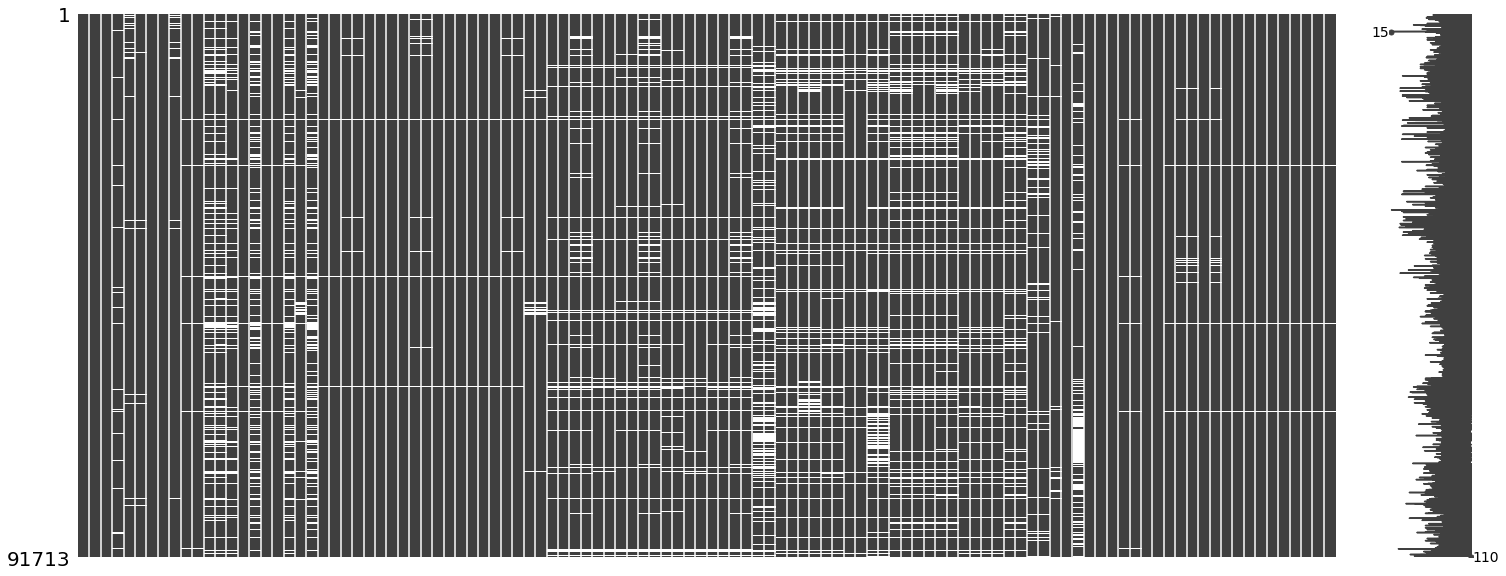

In [151]:
# checking missing values
print(Xmiss.shape)

msno.matrix(Xmiss);

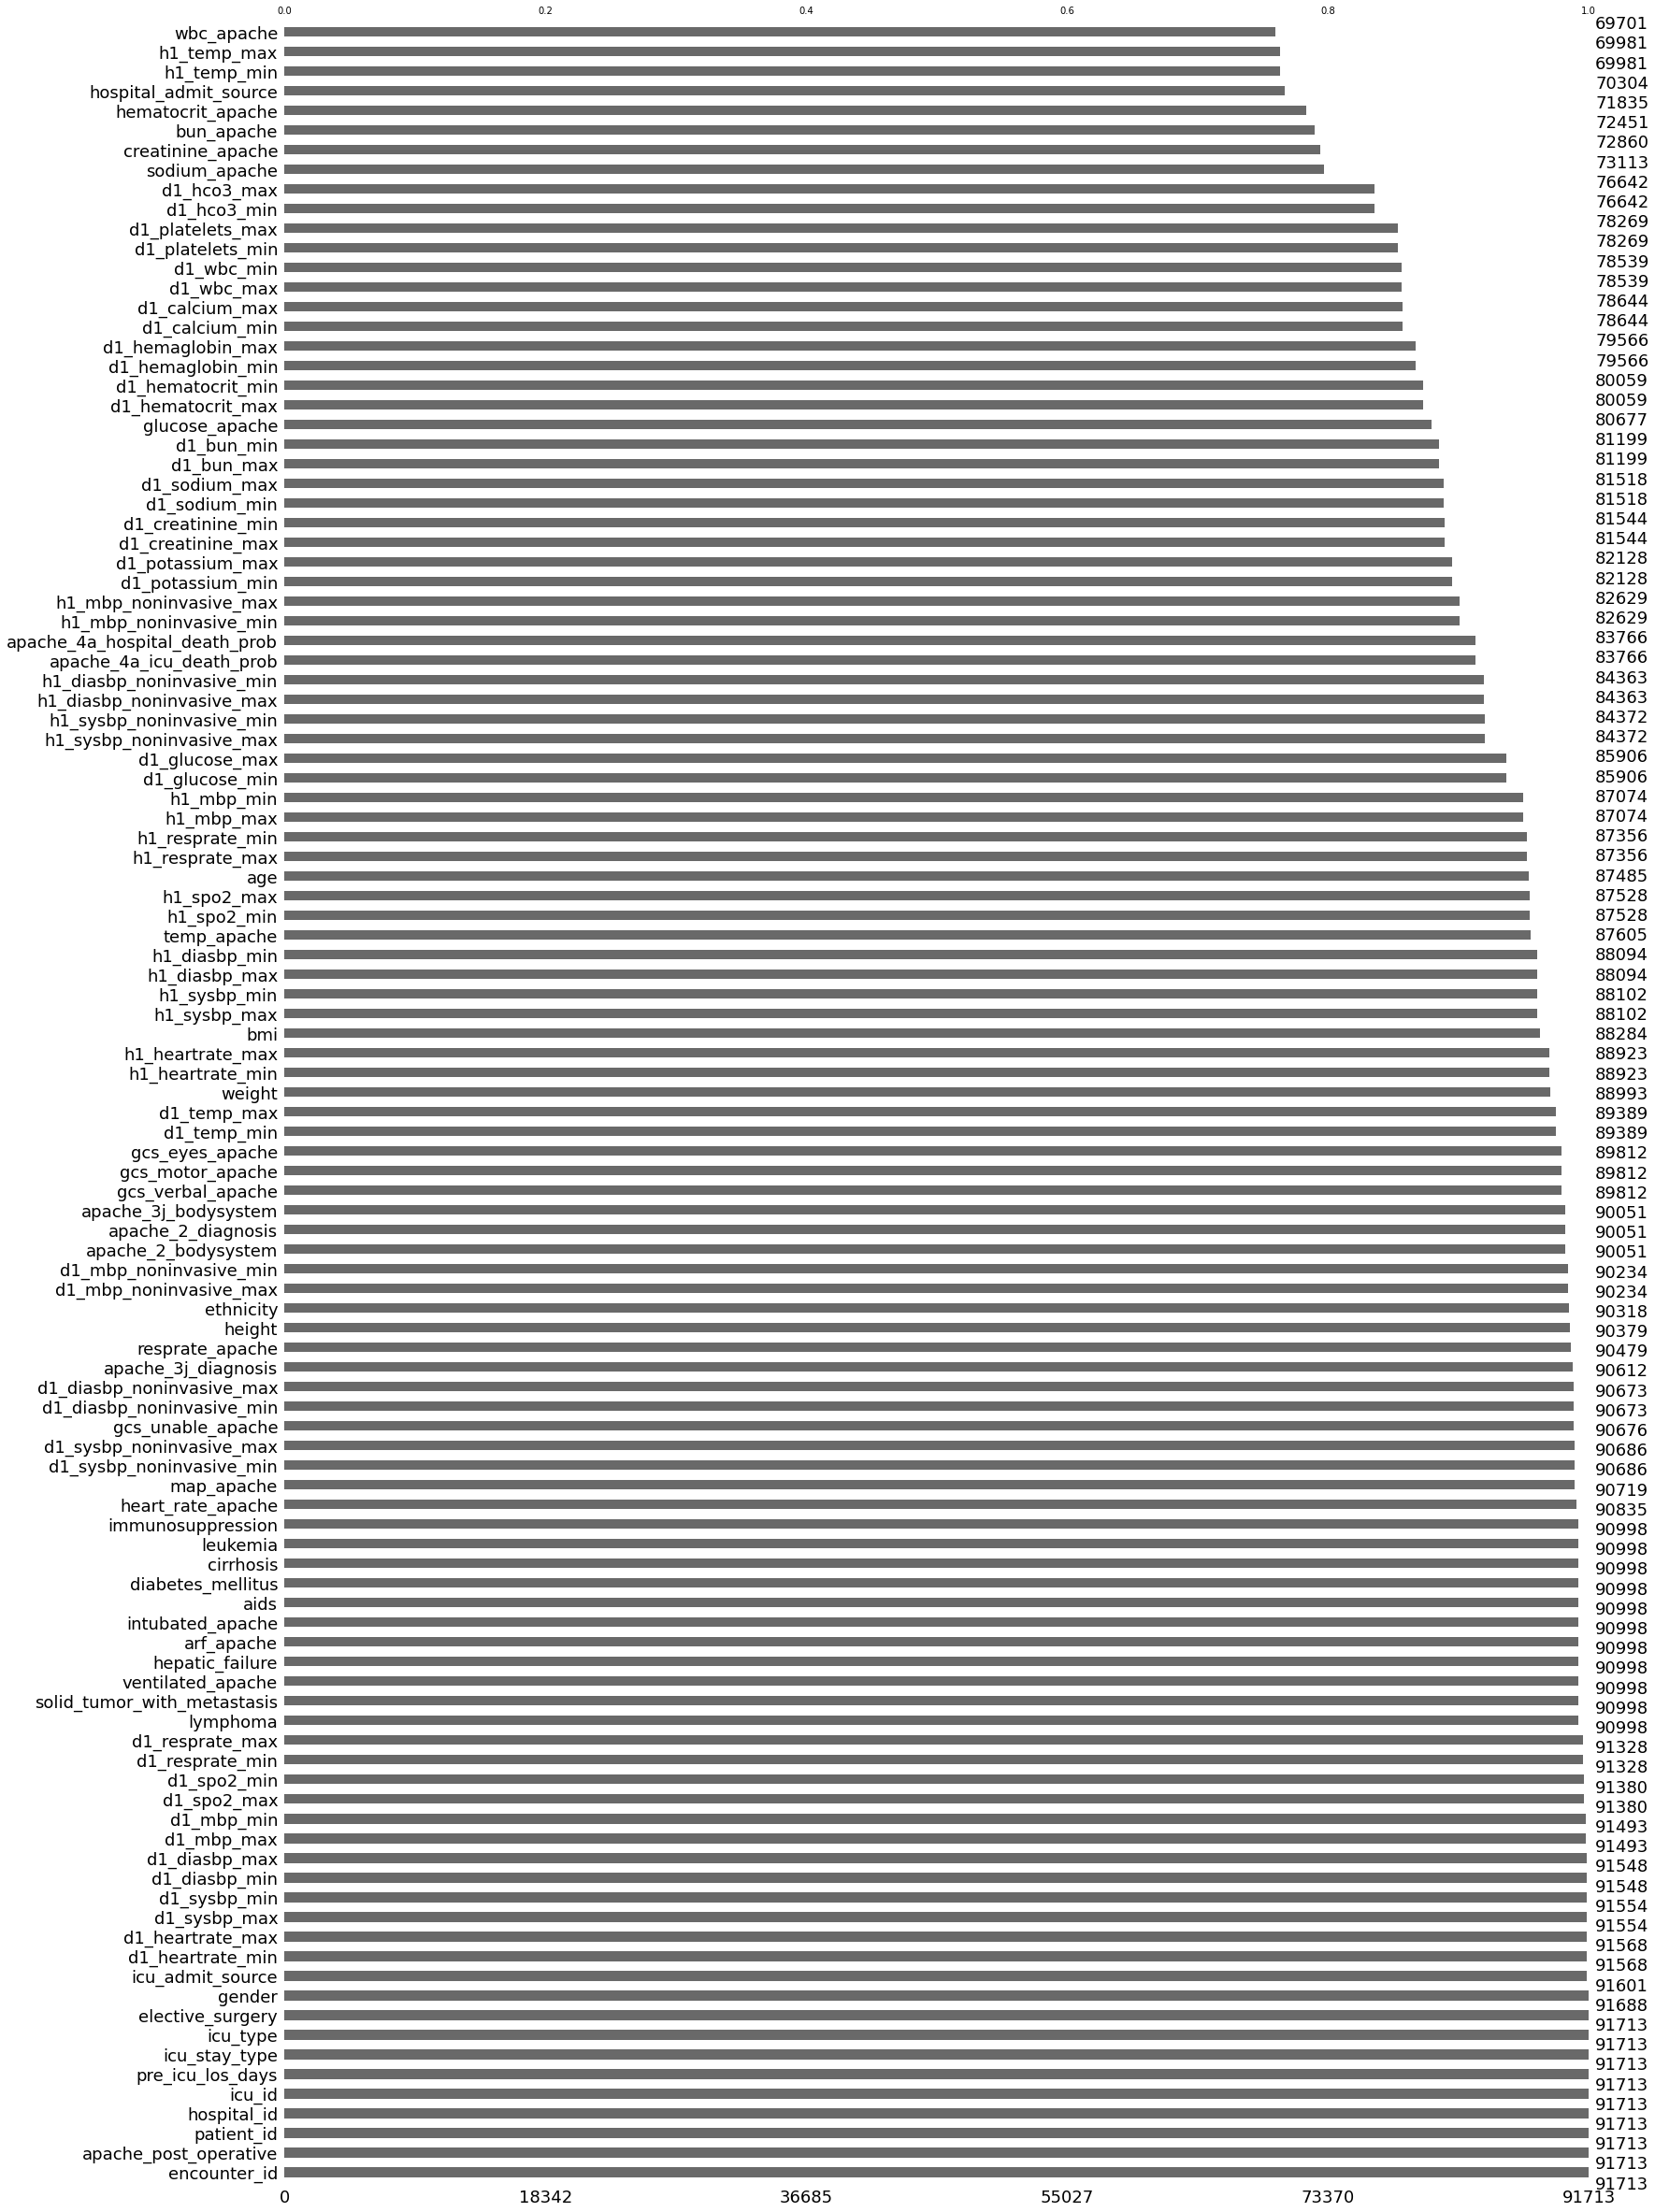

In [152]:
# Now, lets check the distribution of missing values across features
msno.bar(Xmiss, sort='descending', fontsize=18);

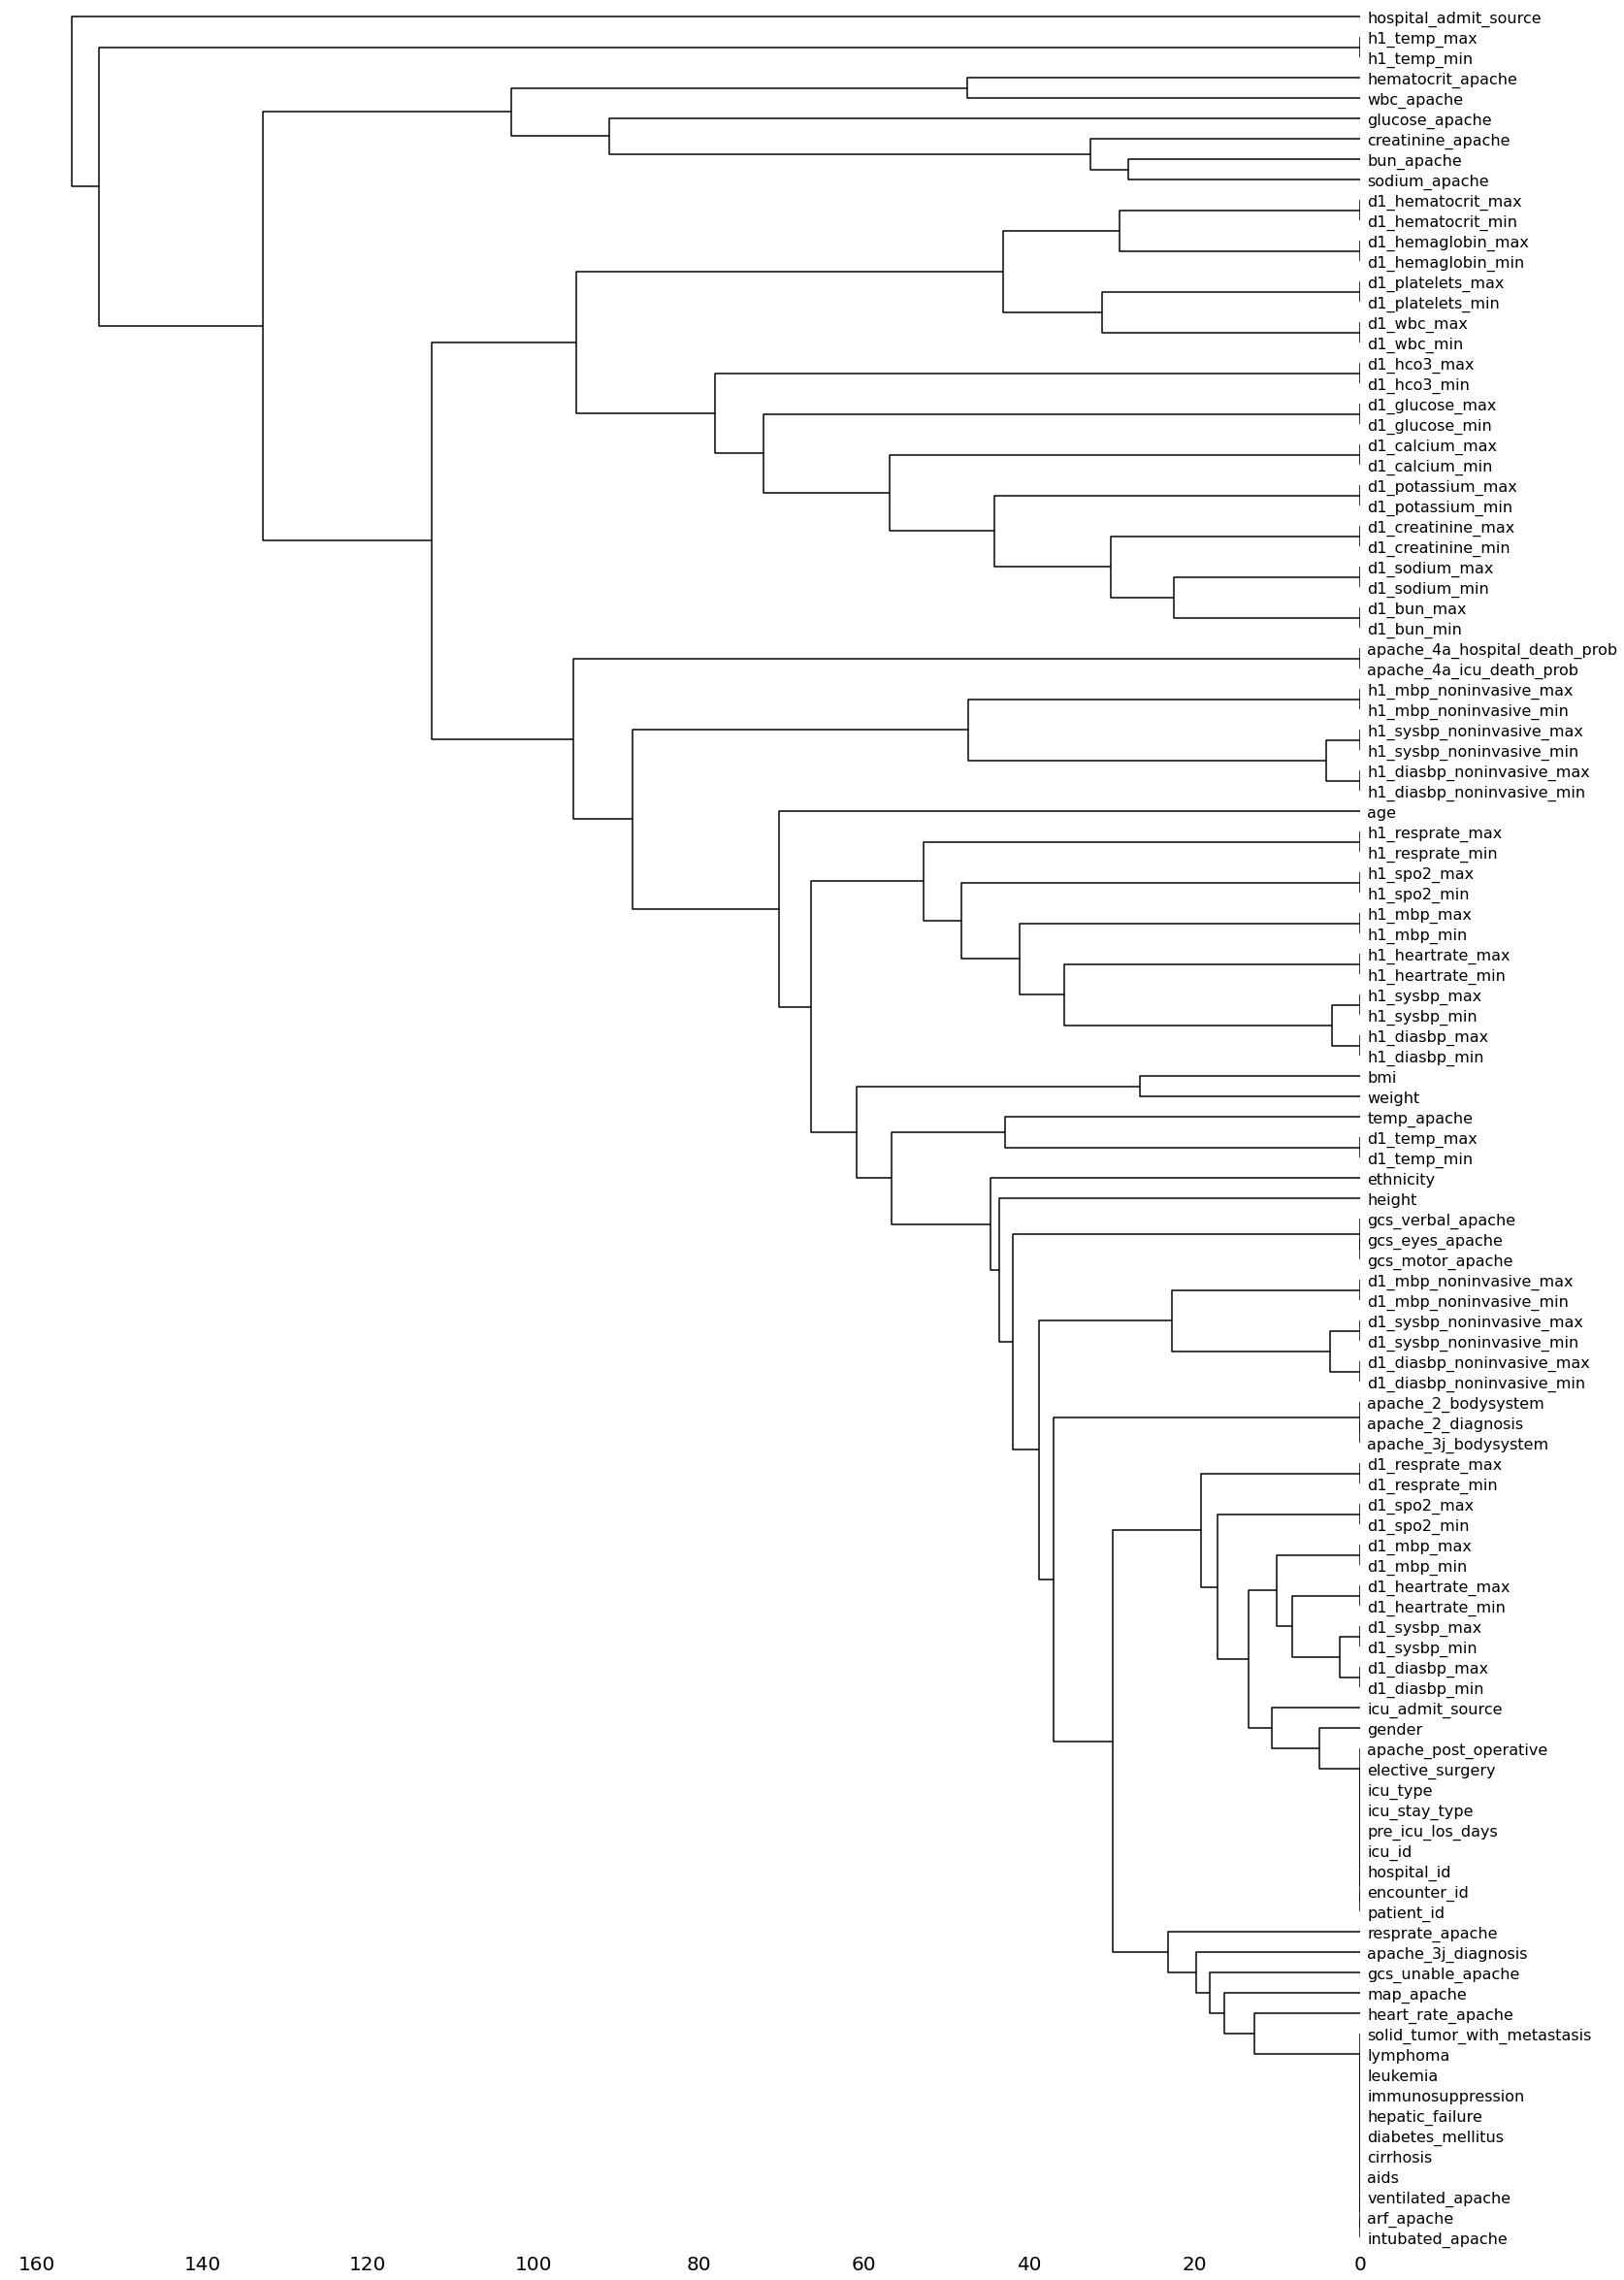

In [153]:
# Checking for any pattern in relationship of missing values
msno.dendrogram(Xmiss);

##### Few interesting observations:
* 'heart_rate_apache' and 'lymphoma'
* ('gender' and 'elective_surgery') with 'icu_admit_source'
* 'bmi' and 'weight'

In [154]:
# Further inspect these features
cols = ['heart_rate_apache', 'lymphoma', 'gender', 'elective_surgery', 'icu_admit_source', 'bmi', 'weight']
for col in cols:
    print(col, "\033[1m Datatype: \033[0m ", Xmiss[col].dtypes)
    print(view_datadict(col), "\n")

heart_rate_apache  Datatype:   float64
The heart rate measured during the first 24 hours which results in the highest APACHE III score in unit: Beats per minute 

lymphoma  Datatype:   category
Whether the patient has been diagnosed with non-Hodgkin lymphoma. in unit: None 

gender  Datatype:   category
The genotypical sex of the patient in unit: None 

elective_surgery  Datatype:   category
Whether the patient was admitted to the hospital for an elective surgical operation in unit: None 

icu_admit_source  Datatype:   category
The location of the patient prior to being admitted to the unit in unit: None 

bmi  Datatype:   float64
The body mass index of the person on unit admission in unit: kilograms/metres^2 

weight  Datatype:   float64
The weight (body mass) of the person on unit admission in unit: kilograms 



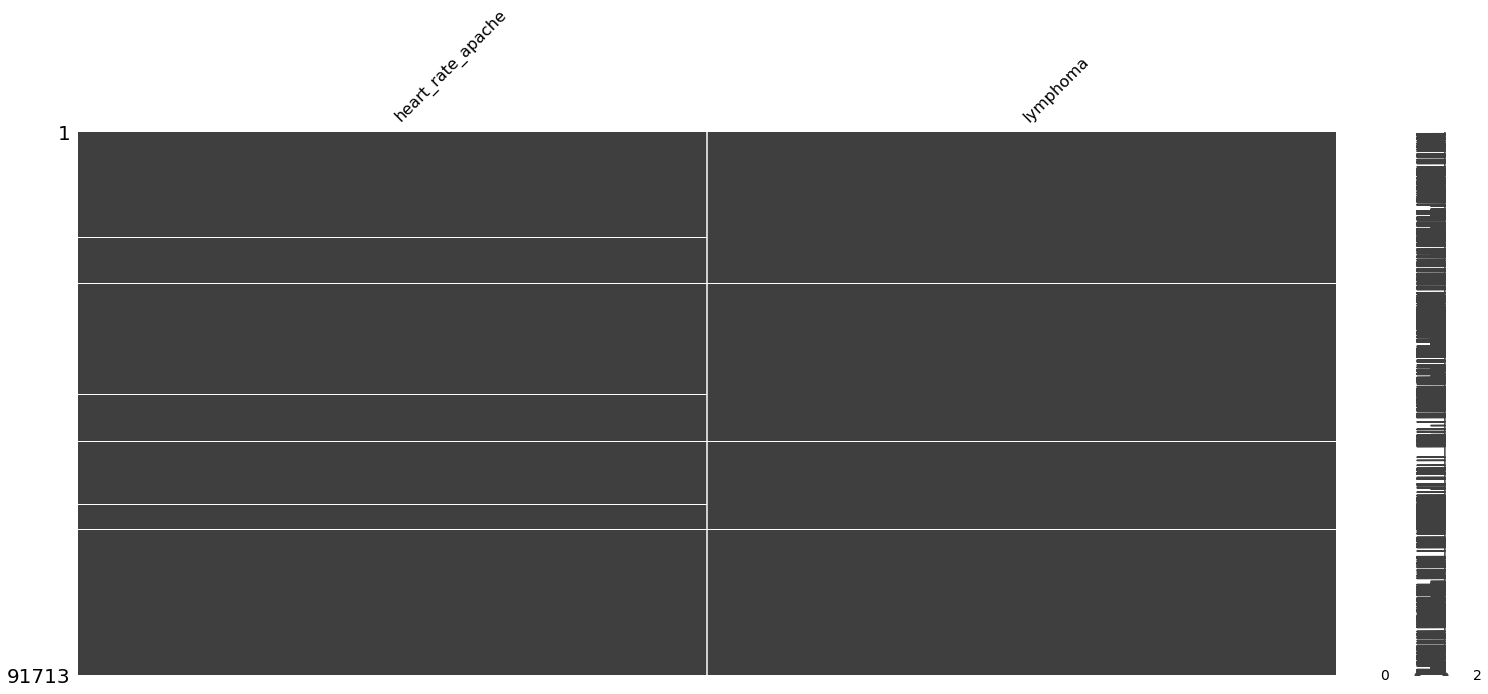

In [155]:
# Checking 'heart_rate_apache' vs 'lymphoma'
msno.matrix(Xmiss[['heart_rate_apache', 'lymphoma']]);

> Missing values in **'heart_rate_apache'** is related to missing values in **'lymphoma'**

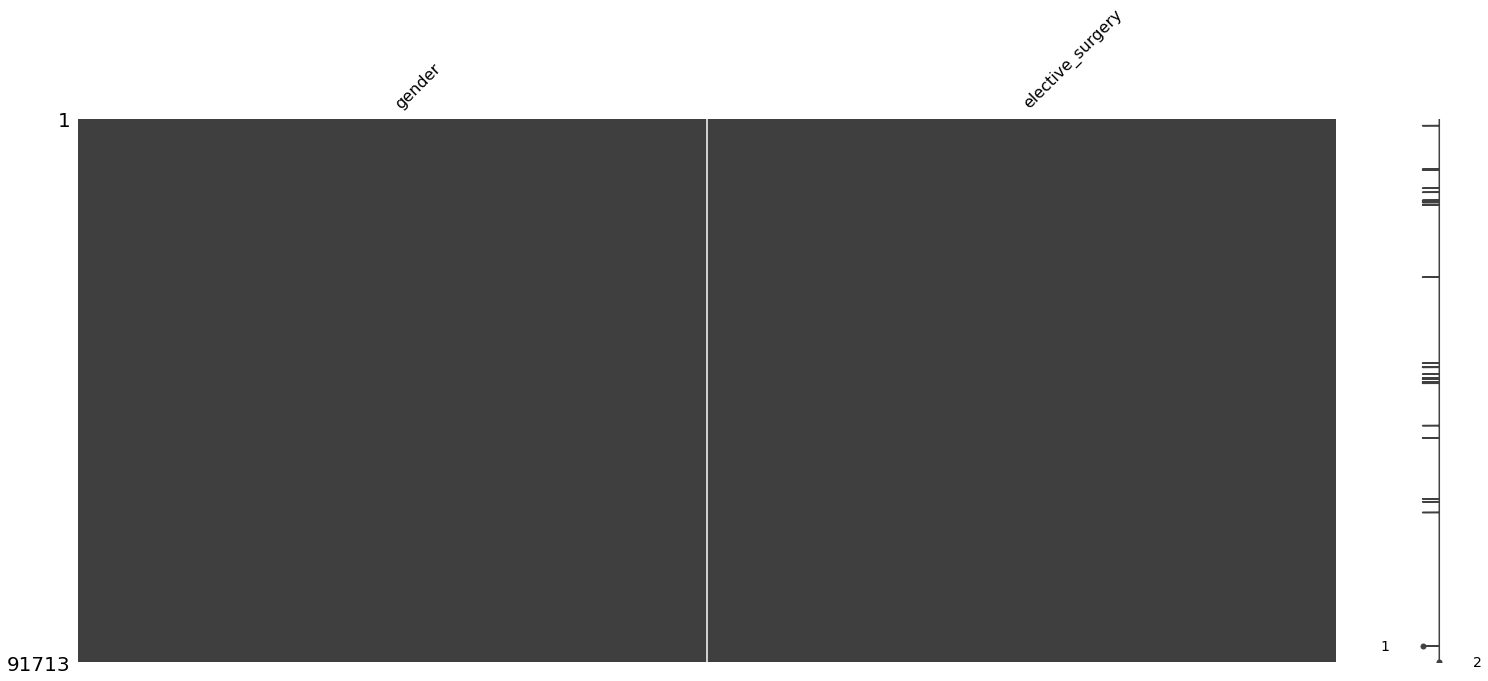

In [156]:
# Checking 'gender' vs 'elective_surgery'
msno.matrix(Xmiss[['gender', 'elective_surgery']]);

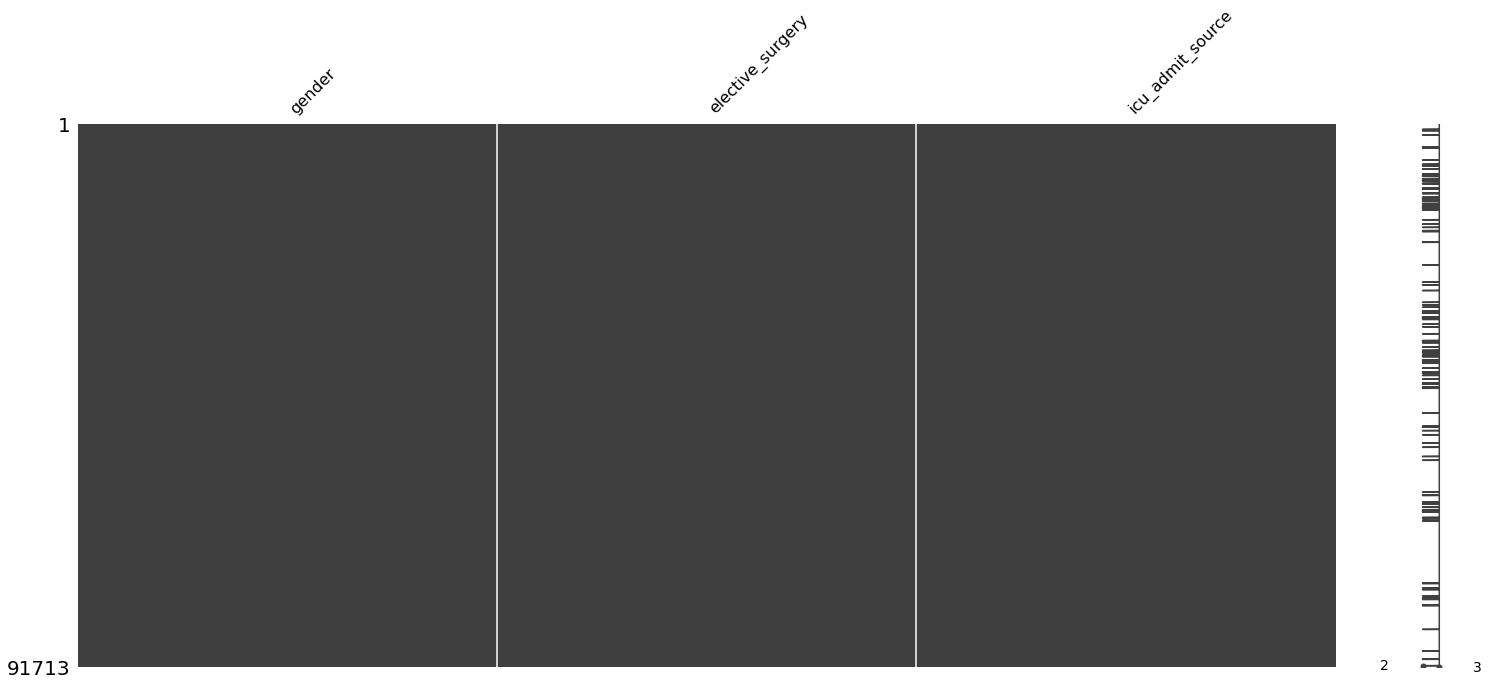

In [157]:
msno.matrix(Xmiss[['gender', 'elective_surgery', 'icu_admit_source']]);

> Failed to visualize any relationship in the missing values in **'gender'**, **'elective_surgery'** and **'icu_admit_source'**.

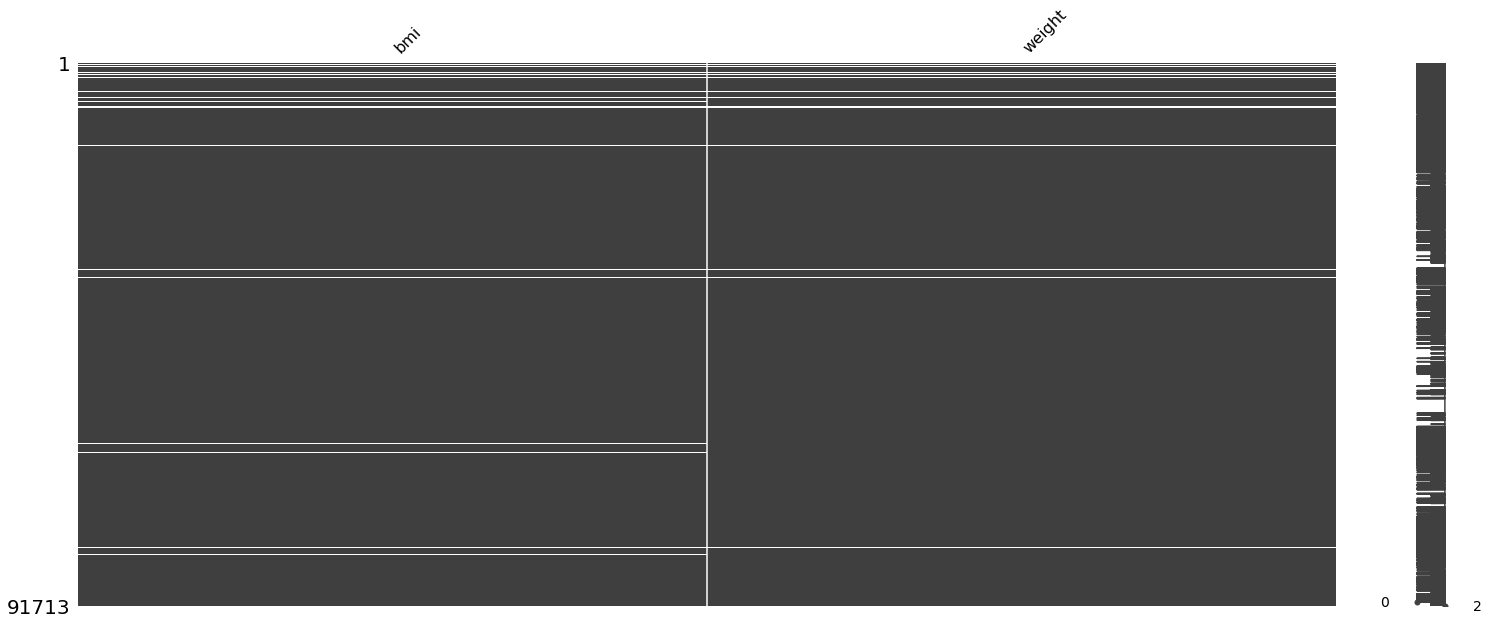

In [158]:
# Checking 'bmi' vs 'weight'
msno.matrix(Xmiss[['bmi', 'weight']]);

<AxesSubplot:>

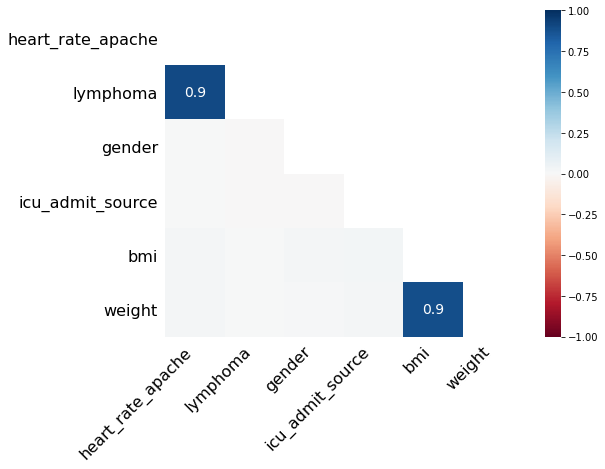

In [159]:
msno.heatmap(Xmiss[cols], figsize=(8,6))

##### Observations:
* Missing values in 'icu_admit_source', 'gender' and 'elective_surgery' are missing completely at random and hence could be dropped.
* Missing values in ('heart_rate_apache' and 'lymphoma') and ('bmi' and 'weight') are not missing completely at random.

In [160]:
# Checking % missing values in 'icu_admit_source', 'gender', 'elective_surgery'
X[['icu_admit_source', 'gender', 'elective_surgery']].isnull().sum()*100/X.shape[0]

icu_admit_source    0.122120
gender              0.027259
elective_surgery    0.000000
dtype: float64

In [161]:
# dropping rows with missing features in 'icu_admit_source', 'gender', 'elective_surgery'
df = pd.concat([X, y], axis=1)
df.loc[:,['icu_admit_source', 'gender', 'elective_surgery']].dropna(axis=0, inplace=True)

In [162]:
# Separating X and y
y = df['hospital_death']
X = df.drop(columns=['hospital_death'], axis=1)
print(X.shape, y.shape)

(91713, 184) (91713,)


In [163]:
# Checking whether ('heart_rate_apache' and 'lymphoma') and ('bmi' and 'weight') has any relationship 
# with features without any missing values

nonmiss = [col for col in X if X[col].isnull().sum()==0]
Xnonmiss = X[nonmiss]
Xnonmiss.head()

encounter_id  patient_id  hospital_id  icu_id  pre_icu_los_days  \
0         66154       25312          118      92          0.541667   
1        114252       59342           81      90          0.927778   
2        119783       50777          118      93          0.000694   
3         79267       46918          118      92          0.000694   
4         92056       34377           33      91          0.073611   

  icu_stay_type      icu_type elective_surgery apache_post_operative  
0         admit         CTICU                0                     0  
1         admit  Med-Surg ICU                0                     0  
2         admit  Med-Surg ICU                0                     0  
3         admit         CTICU                1                     1  
4         admit  Med-Surg ICU                0                     0

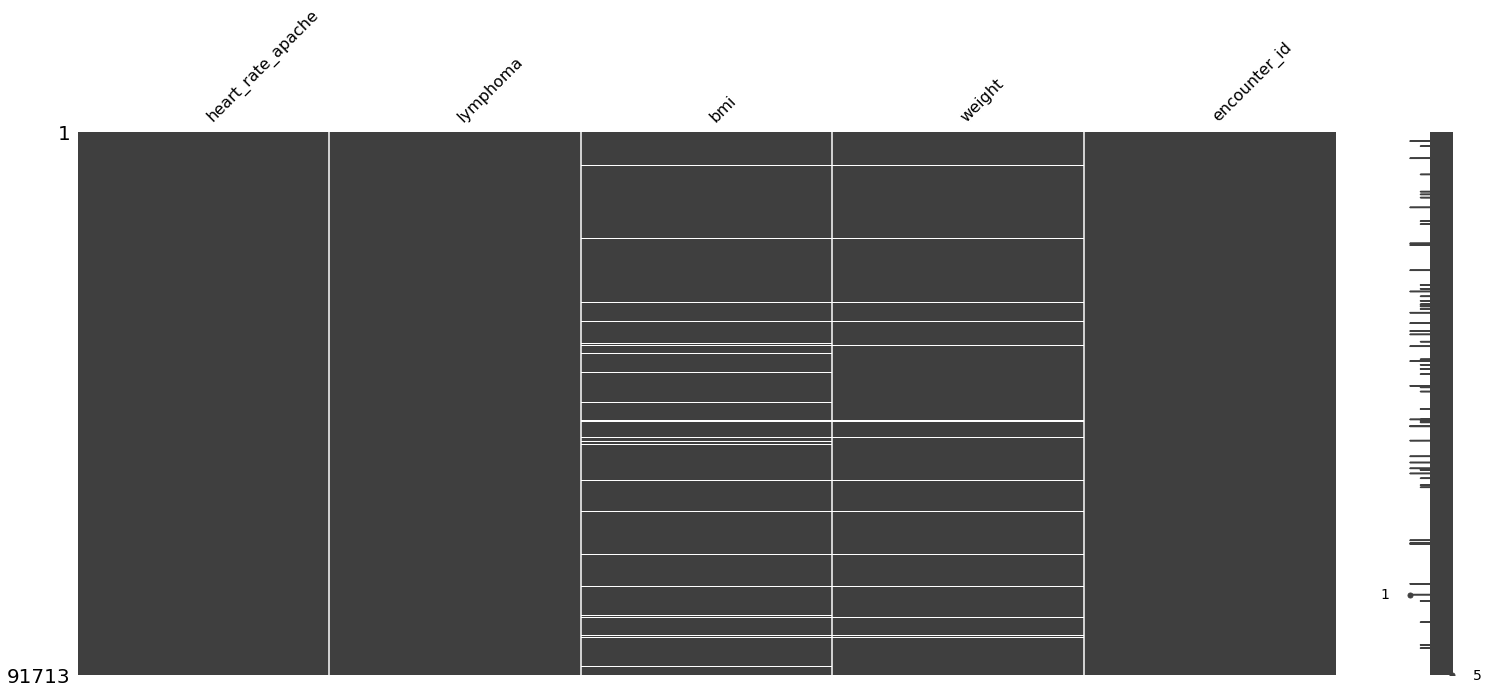

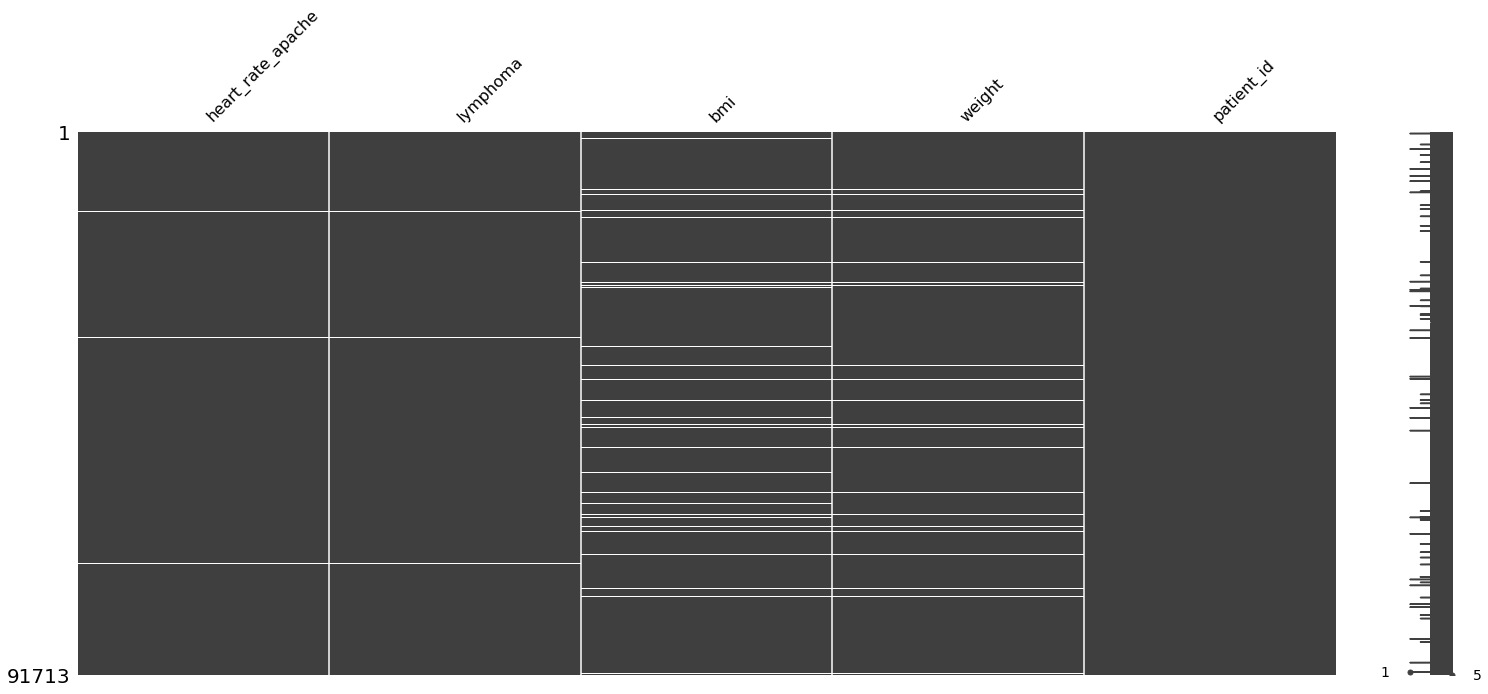

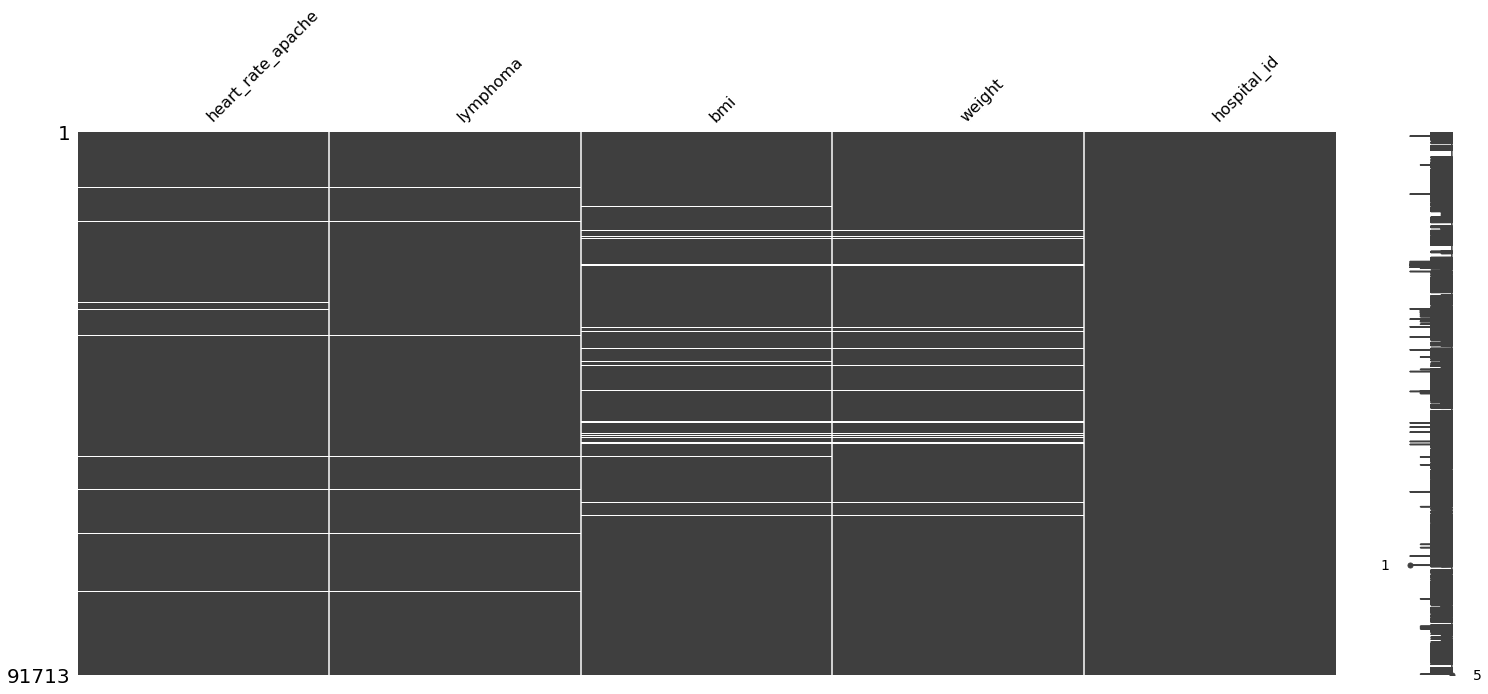

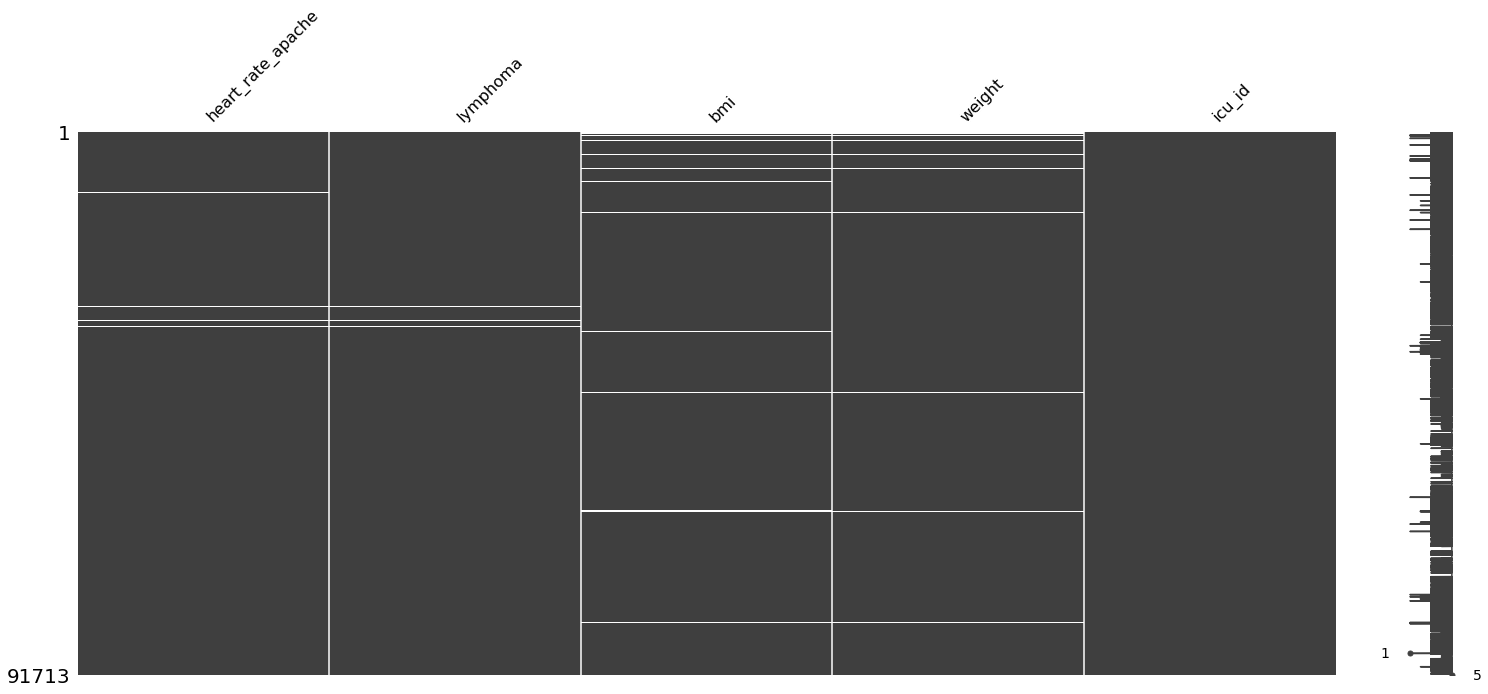

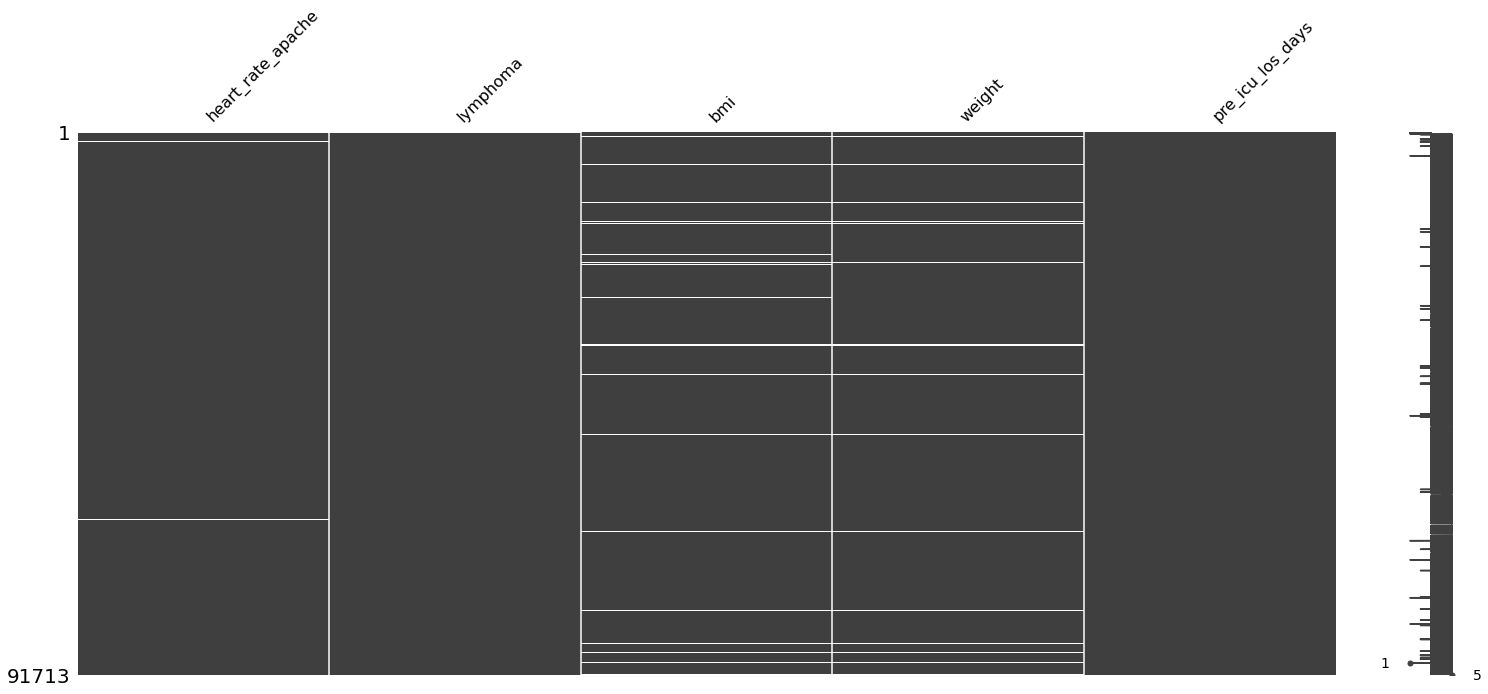

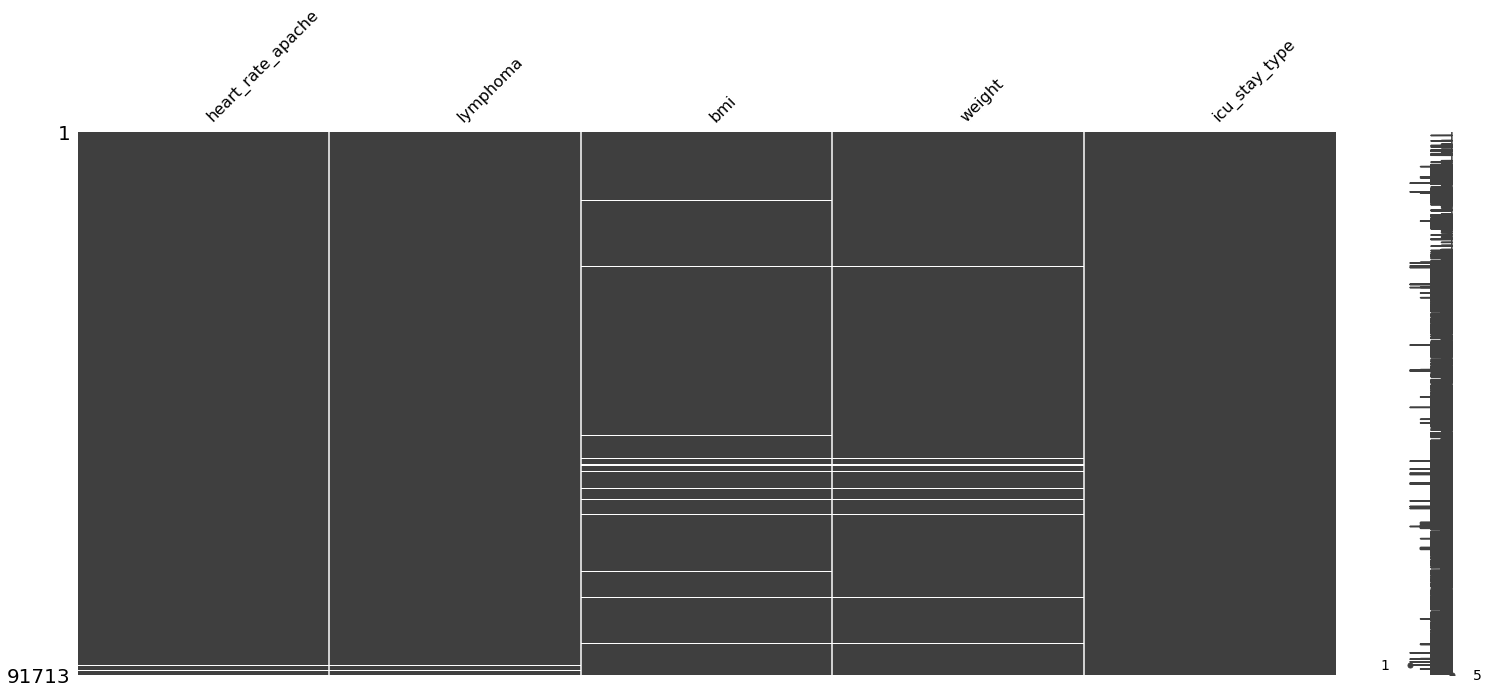

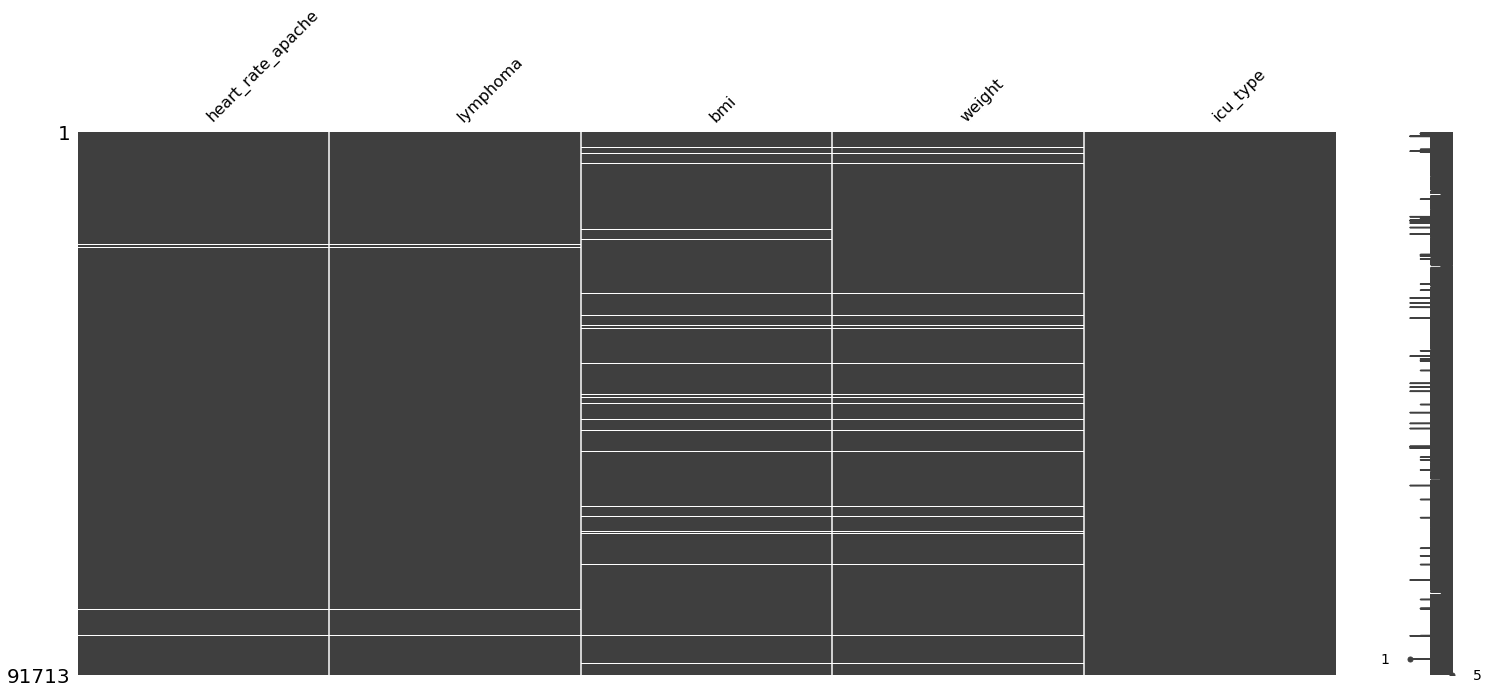

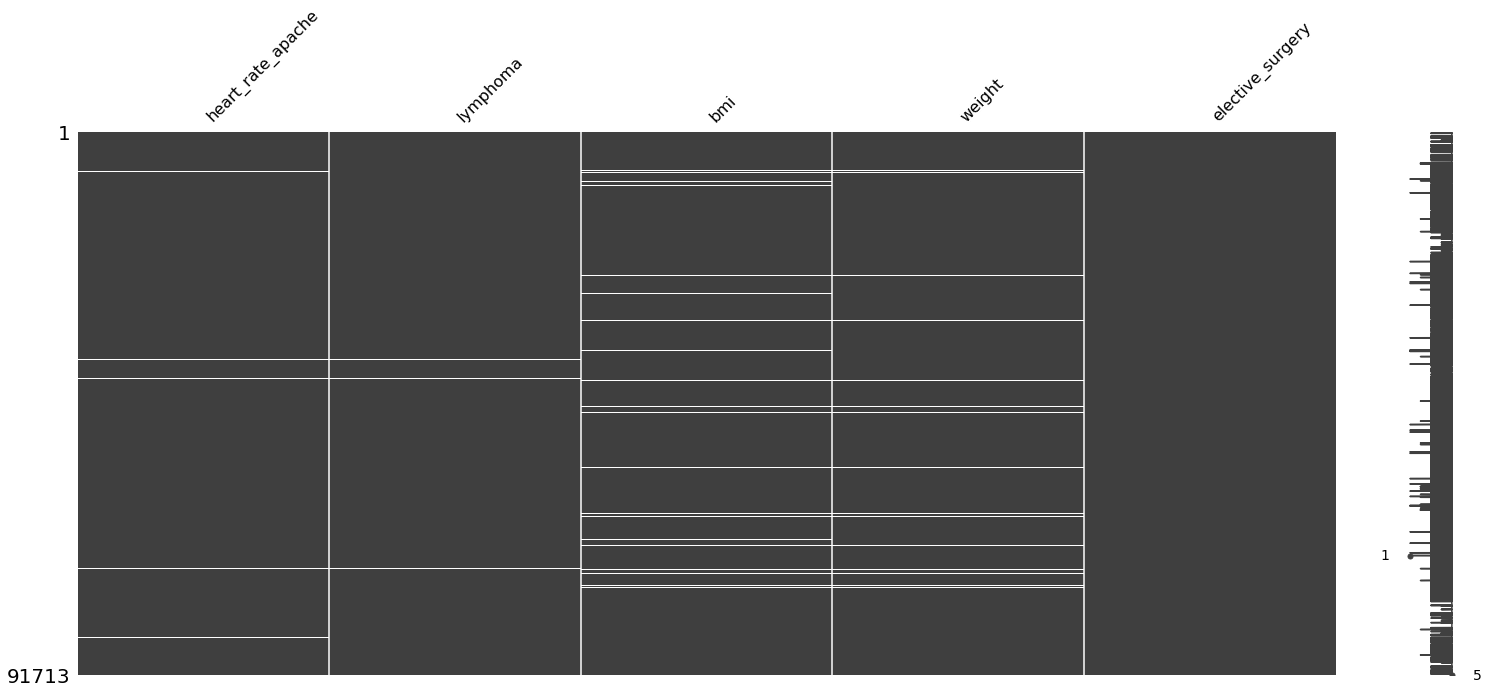

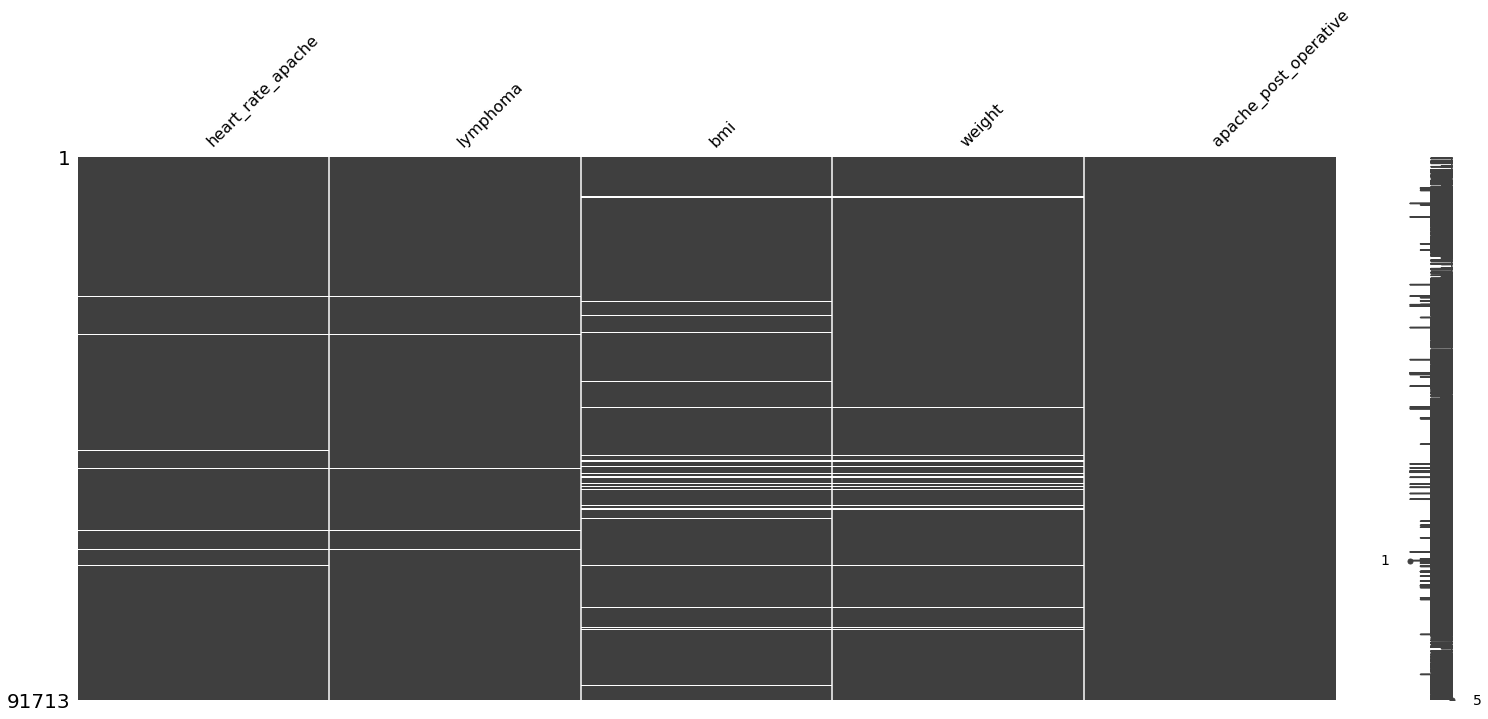

In [164]:
# creating a new dataframe with missing features
X1miss = X[['heart_rate_apache','lymphoma', 'bmi', 'weight']]

# iterating over nonmissing features to find any relationship with missing features
for feat in nonmiss:
    msno.matrix(pd.concat([X1miss, X[feat]], axis=1).sort_values(feat))

No strong relationship could be found except for a faint one for 'icu_stay_type' and 'icu_type' with 'heart_rate_apache' and 'lymphoma'
Hence, we can drop the missing values in these features.

In [165]:
# dropping rows with missing features 
df = pd.concat([X, y], axis=1)
df = df.dropna(subset=['heart_rate_apache', 'lymphoma', 'bmi', 'weight'], how='all')

In [166]:
# Separating X and y
y = dataset['hospital_death']
X = dataset.drop(columns=['hospital_death'], axis=1)
print(X.shape, y.shape)

(91713, 184) (91713,)


In [167]:
# Checking missing values
X.isnull().mean().sort_values(ascending=False)*100

h1_bilirubin_min         92.265001
h1_bilirubin_max         92.265001
h1_lactate_min           91.992411
h1_lactate_max           91.992411
h1_albumin_min           91.398166
                           ...    
icu_stay_type             0.000000
icu_type                  0.000000
pre_icu_los_days          0.000000
apache_post_operative     0.000000
encounter_id              0.000000
Length: 184, dtype: float64

In [168]:
# dropping features with missing values > 0.5
thresh = len(Xmiss)*0.5
X.dropna(axis=1, thresh=thresh, inplace=True)

# Checking missing values
X.isnull().mean().sort_values(ascending=False)*100

wbc_apache               24.000960
h1_temp_max              23.695659
h1_temp_min              23.695659
hospital_admit_source    23.343474
hematocrit_apache        21.674136
                           ...    
icu_stay_type             0.000000
icu_type                  0.000000
pre_icu_los_days          0.000000
apache_post_operative     0.000000
encounter_id              0.000000
Length: 110, dtype: float64

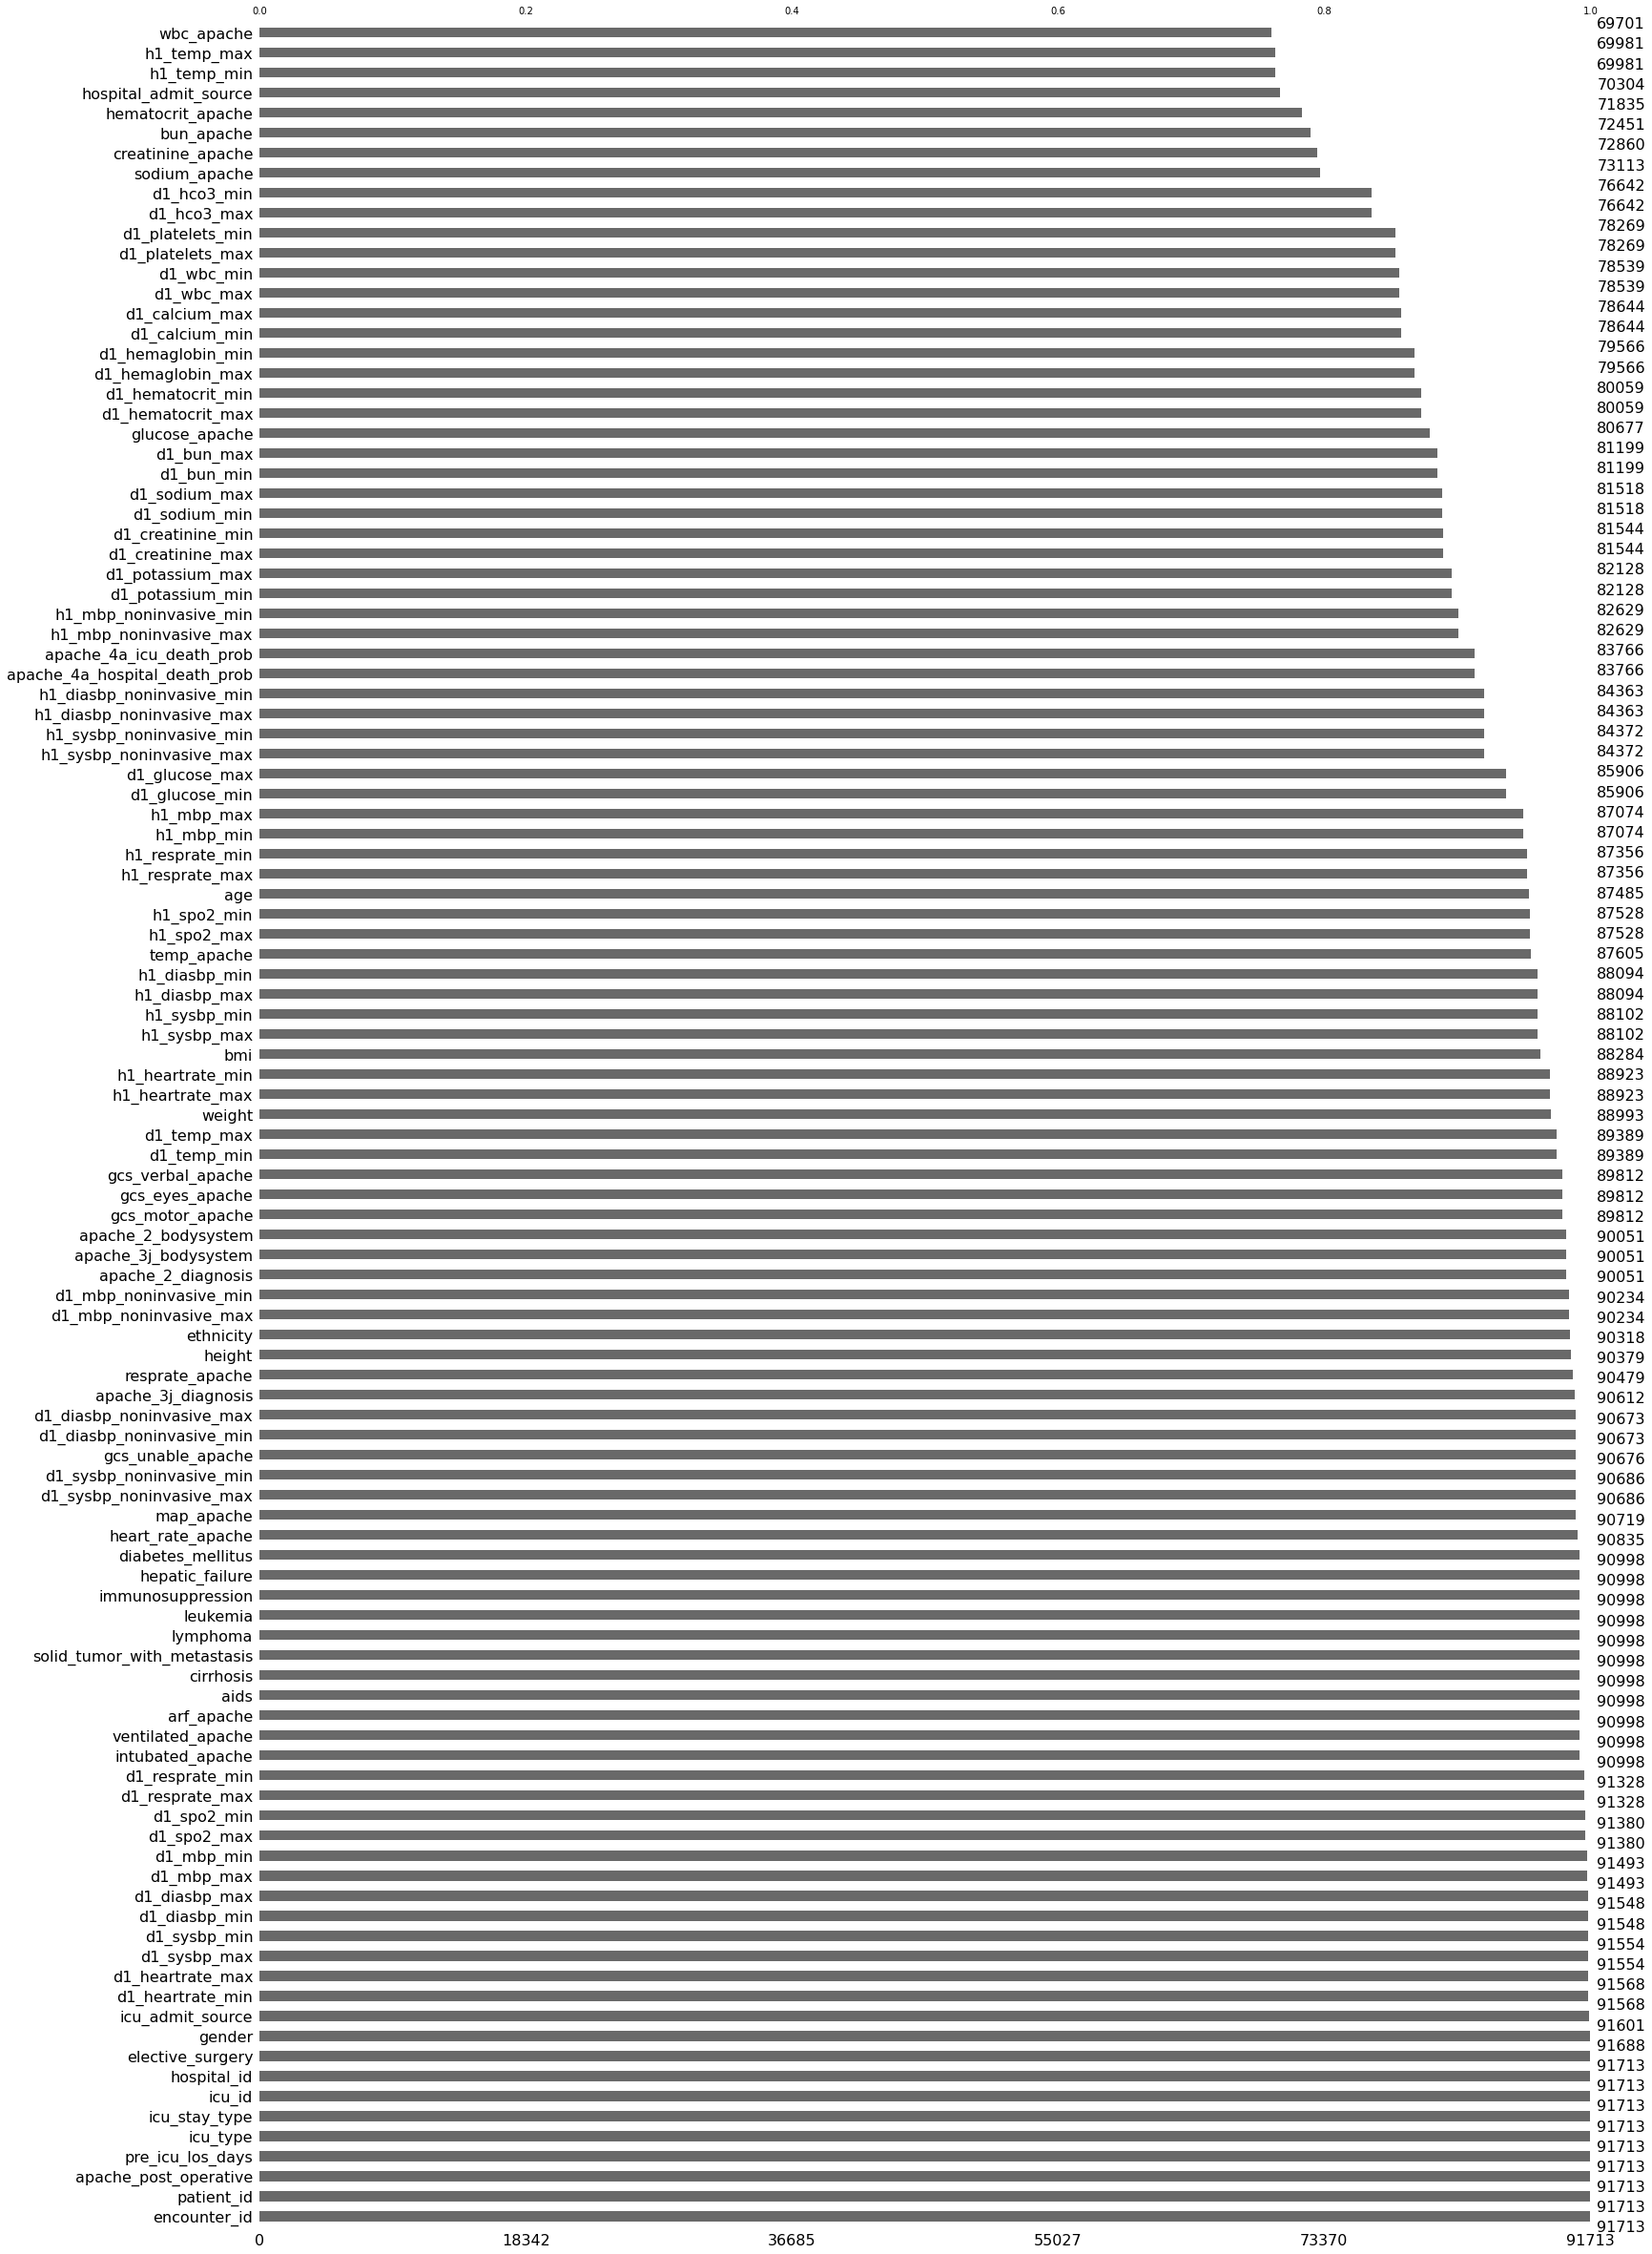

In [169]:
msno.bar(X, sort='descending');

In [170]:
# imputing missing values with mean and mode
for col in X:
    if X[col].dtypes in ['int64', 'float64']:
        X[col] = X[col].fillna(X[col].mean())
    else:
        X[col] = X[col].fillna(X[col].mode()[0])

In [171]:
X.isnull().sum().sort_values(ascending=False)

encounter_id           0
h1_spo2_min            0
d1_creatinine_max      0
d1_calcium_min         0
d1_calcium_max         0
                      ..
temp_apache            0
sodium_apache          0
resprate_apache        0
map_apache             0
apache_2_bodysystem    0
Length: 110, dtype: int64

# Feature Transformation

In [172]:
Xnum = X.select_dtypes(['int', 'float'])
Xnum.shape

(91713, 96)

In [173]:
Xcat = X[[col for col in X if col not in Xnum]]
Xcat.shape

(91713, 14)

In [174]:
# Updating positively skewed features
pos_skew = [feat for feat in pos_skew if feat in Xnum.columns]
pos_skew

['bmi',
 'pre_icu_los_days',
 'weight',
 'apache_3j_diagnosis',
 'bun_apache',
 'creatinine_apache',
 'glucose_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_noninvasive_max',
 'd1_mbp_max',
 'd1_mbp_noninvasive_max',
 'd1_resprate_max',
 'd1_temp_max',
 'h1_resprate_max',
 'h1_resprate_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_glucose_max',
 'd1_glucose_min',
 'd1_platelets_max',
 'd1_platelets_min',
 'd1_potassium_max',
 'd1_wbc_max',
 'd1_wbc_min']

In [175]:
# Updating negatively skewed features
neg_skew = [feat for feat in neg_skew if feat in Xnum.columns]
neg_skew

['temp_apache',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_temp_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_temp_min',
 'd1_sodium_min',
 'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob']

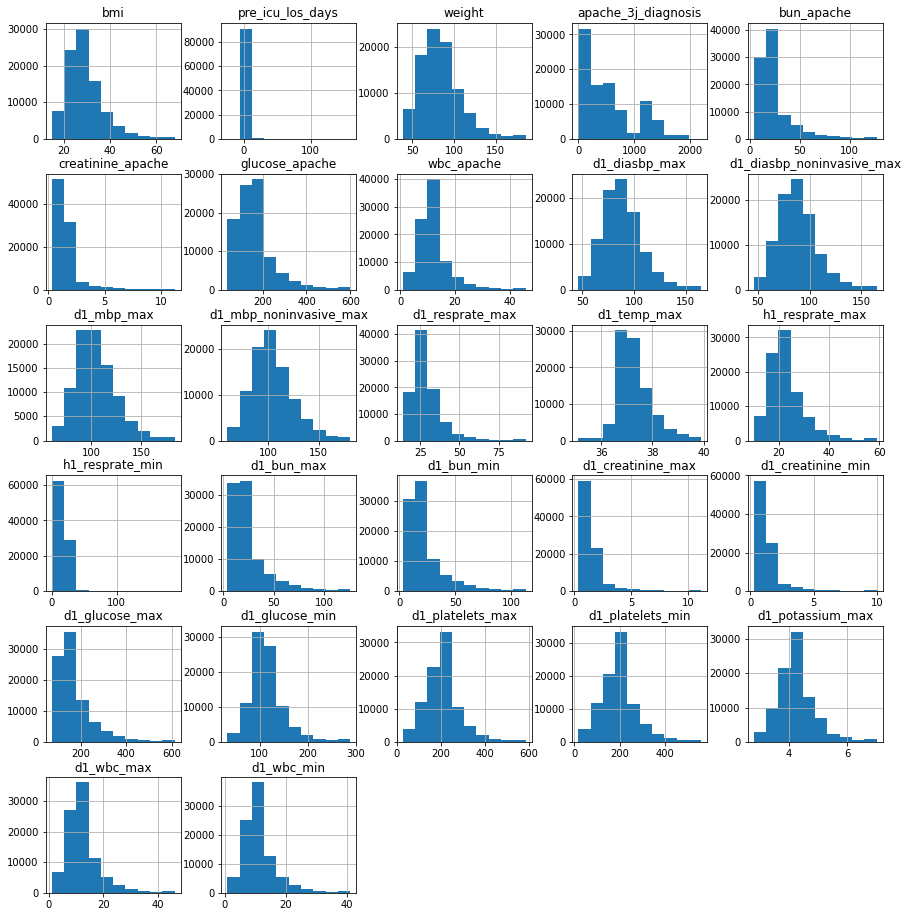

In [176]:
# Visualizing the distribution of positively skewed features
Xnum[pos_skew].hist(figsize=(15,16));

In [177]:
# Checking for features with negative or 0 values
negativefeats = []
for feat in Xnum[pos_skew].columns:
    if Xnum[feat].min() <= 0:
        negativefeats.append(feat)
        
print(negativefeats)

['pre_icu_los_days', 'h1_resprate_min']


In [178]:
for feat in negativefeats:
    print("\033[1m", feat,"\033[0m:", view_datadict(feat), "\n")

 pre_icu_los_days : The length of stay of the patient between hospital admission and unit admission in unit: Days 

 h1_resprate_min : The patient's lowest respiratory rate during the first hour of their unit stay in unit: Breaths per minute 



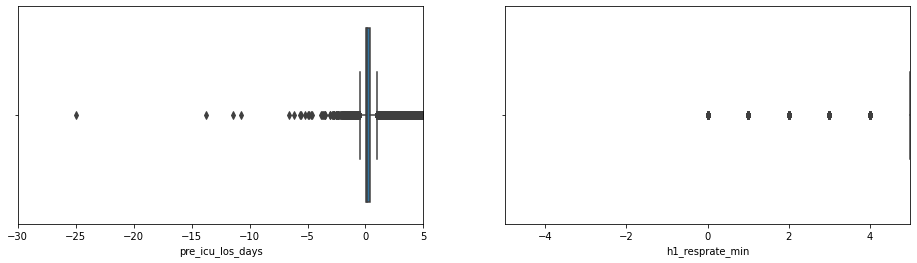

In [179]:
# Plotting boxplots in the negative range
plt.subplots(1,2, figsize=(16,4))
ax1 = plt.subplot(1,2,1)
sns.boxplot(x=Xnum['pre_icu_los_days']);
plt.xlim(-30,5)
ax2 = plt.subplot(1,2,2)
sns.boxplot(x=Xnum['h1_resprate_min']);
plt.xlim(-5,5)
plt.show()

Since days cannot be negative, negative values in 'pre_icu_los_days' might be an entry error.

In [180]:
# Converting all negative values to 0
Xnum.loc[:,'pre_icu_los_days'] = np.where(Xnum.loc[:,'pre_icu_los_days']<0, 0, Xnum.loc[:,'pre_icu_los_days'])

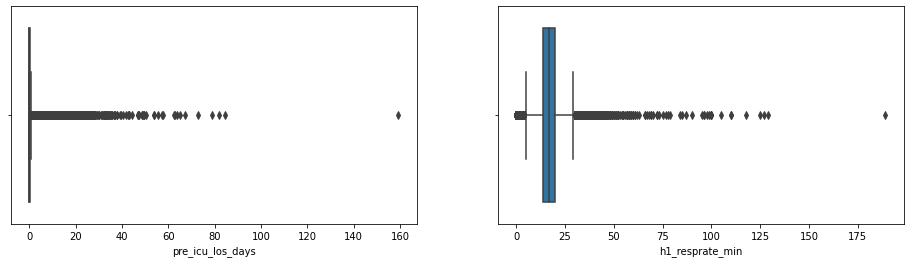

In [181]:
# Plotting boxplots in the negative range
plt.subplots(1,2, figsize=(16,4))
ax1 = plt.subplot(1,2,1)
sns.boxplot(x=Xnum['pre_icu_los_days']);
ax2 = plt.subplot(1,2,2)
sns.boxplot(x=Xnum['h1_resprate_min']);
plt.show()

In [182]:
# Applying log transformation on positively skewed numerical features
for feat in Xnum[pos_skew]:
    Xnum.loc[:, feat] = np.log1p(Xnum.loc[:, feat])

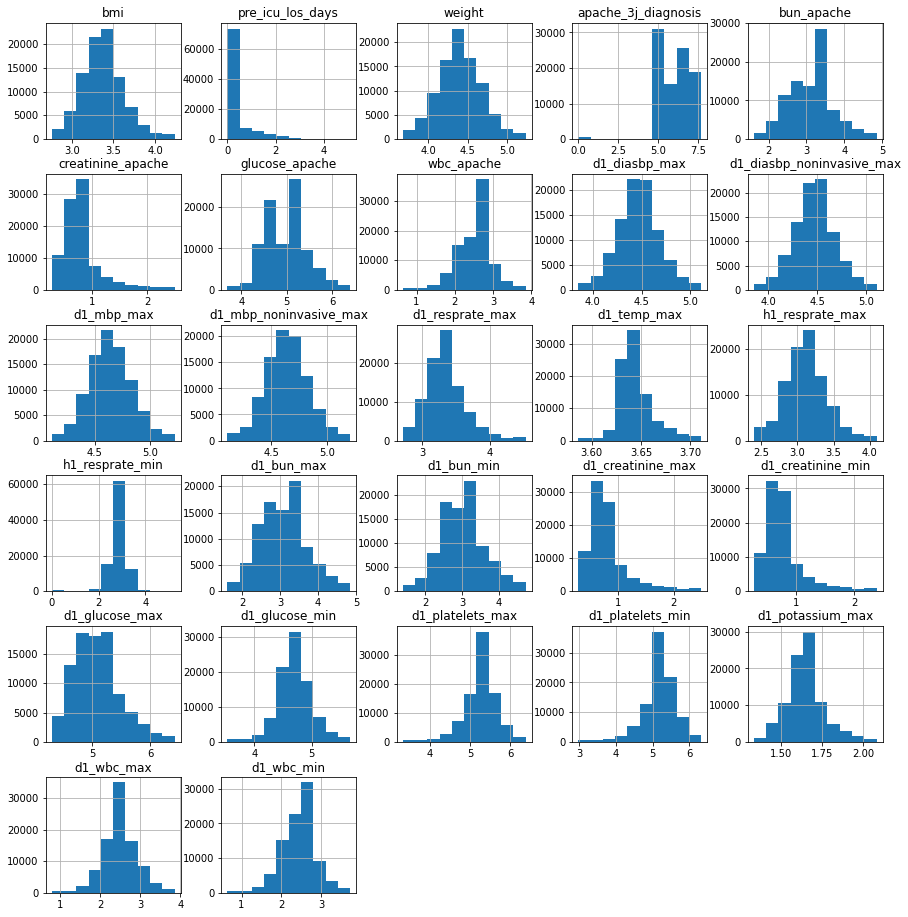

In [183]:
# Visualizing the distribution of positively skewed features
Xnum[pos_skew].hist(figsize=(15,16));

Wall time: 827 ms


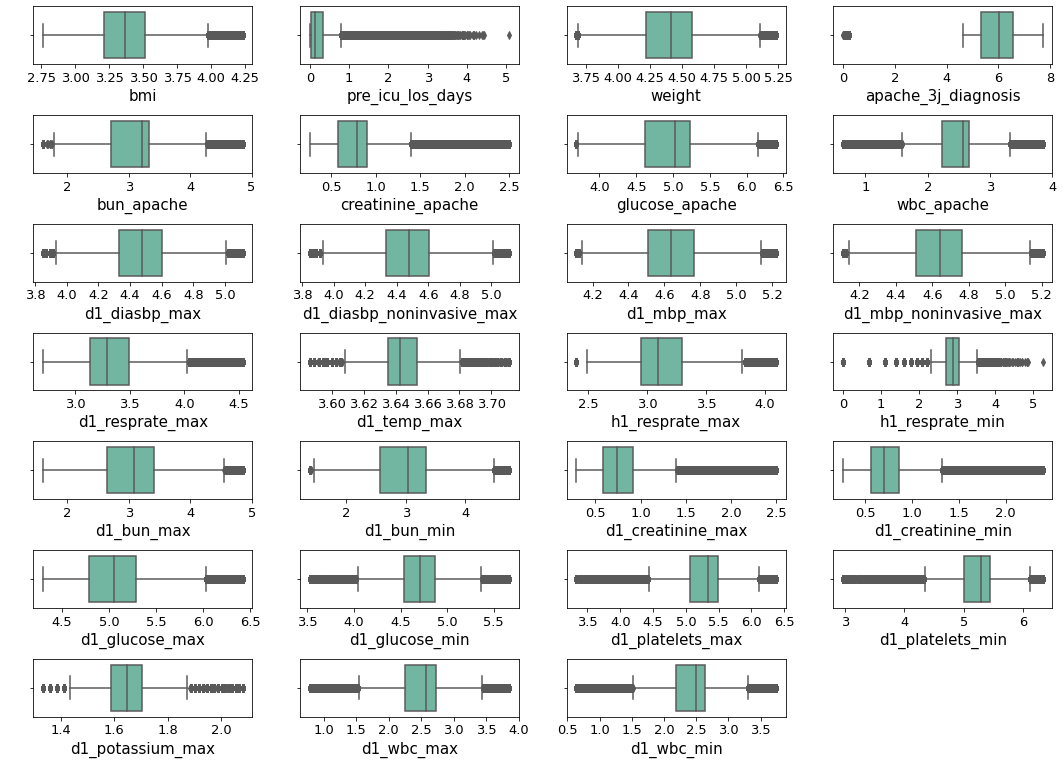

In [184]:
%%time
# plotting boxplots
boxplots(Xnum[pos_skew], size=(15, 60), layout=(40,4), )

In [185]:
# Saving Xnum
Xnum.to_csv('Xnum.csv')

In [186]:
# Treating outliers through winsorizing
for feat in pos_skew:    
    q1 = Xnum.loc[:,feat].quantile(0.25)
    q3 = Xnum.loc[:,feat].quantile(0.75)
    iqr = q3 - q1
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    Xnum.loc[:,feat] = np.where(Xnum.loc[:,feat]>upper, upper, np.where(Xnum.loc[:,feat]<lower, lower, Xnum.loc[:,feat]))

Wall time: 841 ms


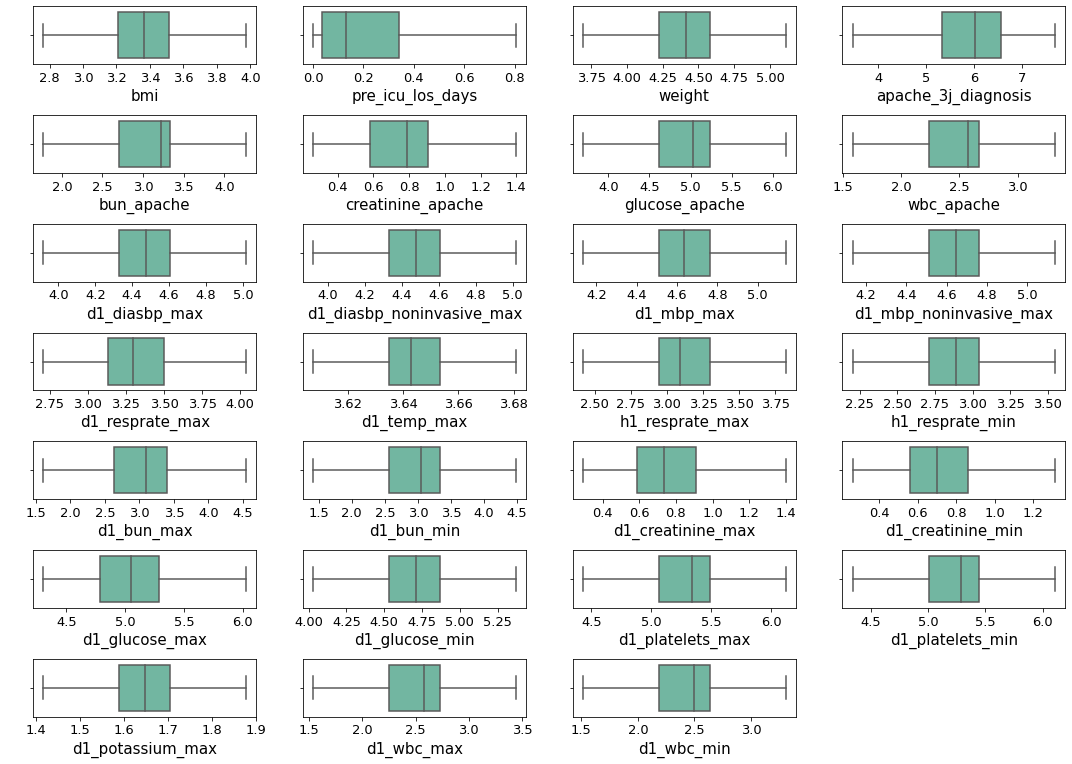

In [187]:
%%time
# plotting boxplots
boxplots(Xnum[pos_skew], size=(15, 60), layout=(40,4), )

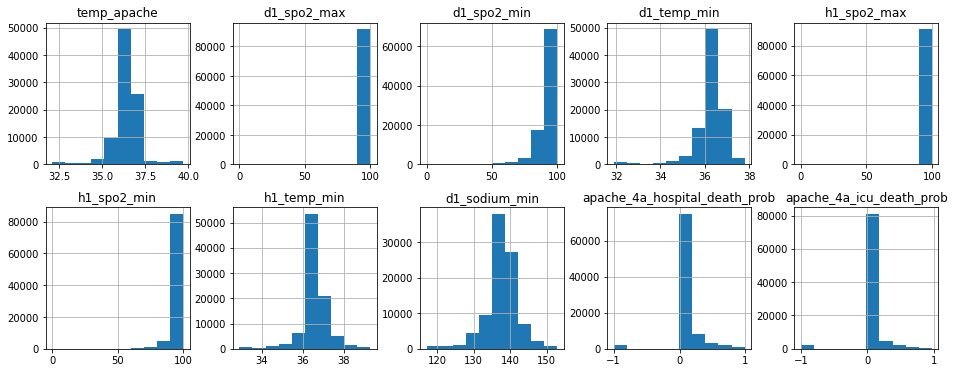

In [188]:
# Visualizing negatively skewed features
Xnum[neg_skew].hist(layout=(2,5), figsize=(16,6));

In [189]:
# Binarizing negatively skewed features
for feat in neg_skew:
    med = Xnum[feat].median()
    Xnum[feat] = np.where(Xnum[feat]>=med, "High", "Low")

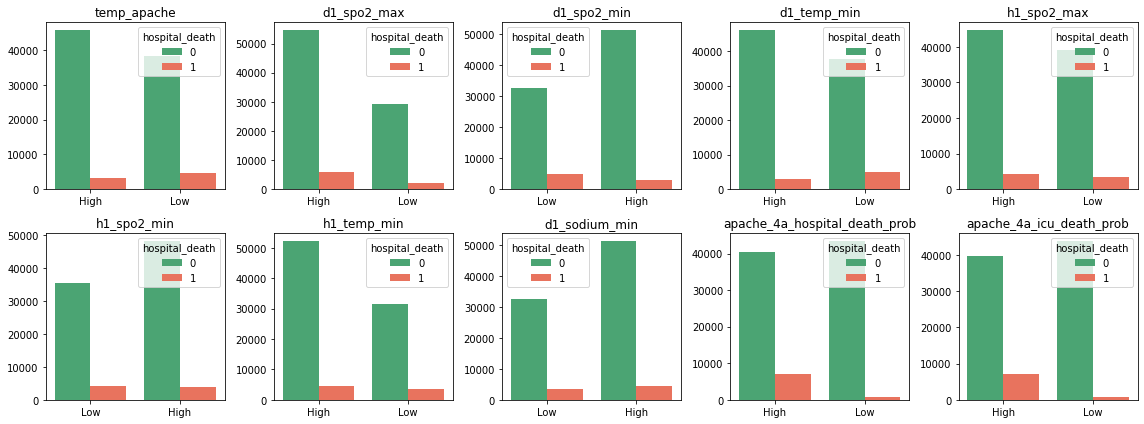

In [190]:
# Plotting negatively skewed features
plt.figure(figsize=(16,6))
plotnumber = 1

for col in neg_skew:
    if plotnumber < 11:
        ax1 = plt.subplot(2,5,plotnumber)
        sns.countplot(x=Xnum[col], hue=y, palette=['MediumSeaGreen', 'Tomato'])
        plt.title(f"{col}")
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

In [191]:
# Concatenating binarized negatively skewed features along with categorical features
Xcat = pd.concat([Xcat, Xnum[neg_skew]], axis=1)
Xcat.head()

encounter_id  patient_id  hospital_id  elective_surgery  ethnicity gender  \
0         66154       25312          118                 0  Caucasian      M   
1        114252       59342           81                 0  Caucasian      F   
2        119783       50777          118                 0  Caucasian      F   
3         79267       46918          118                 1  Caucasian      F   
4         92056       34377           33                 0  Caucasian      M   

  hospital_admit_source           icu_admit_source  icu_id icu_stay_type  \
0                 Floor                      Floor      92         admit   
1                 Floor                      Floor      90         admit   
2  Emergency Department       Accident & Emergency      93         admit   
3        Operating Room  Operating Room / Recovery      92         admit   
4  Emergency Department       Accident & Emergency      91         admit   

       icu_type  apache_post_operative apache_3j_bodysystem  \
0         CTICU                      0               Sepsis   
1  Med-Surg ICU                      0          Respiratory   
2  Med-Surg ICU                      0            Metabolic   
3         CTICU                      1       Cardiovascular   
4  Med-Surg ICU                      0               Trauma   

  apache_2_bodysystem temp_apache d1_spo2_max d1_spo2_min d1_temp_min  \
0      Cardiovascular        High        High         Low        High   
1         Respiratory         Low        High         Low         Low   
2           Metabolic        High         Low         Low        High   
3      Cardiovascular         Low        High        High         Low   
4              Trauma        High        High        High        High   

  h1_spo2_max h1_spo2_min h1_temp_min d1_sodium_min  \
0        High         Low        High           Low   
1         Low         Low         Low          High   
2         Low         Low        High          High   
3        High        High         Low          High   
4        High        High        High          High   

  apache_4a_hospital_death_prob apache_4a_icu_death_prob  
0                          High                     High  
1                          High                     High  
2                           Low                      Low  
3                           Low                     High  
4                          High                     High

In [192]:
# Dropping negatively skewed features from numerical features
Xnum = Xnum.drop(columns=neg_skew, axis=1)

In [193]:
# Converting Xcat features to type 'category'
for feat in Xcat.columns:
    Xcat[feat] = Xcat[feat].astype('category')

In [194]:
# dropping all id features from Xcat
idcols = ['encounter_id', 'patient_id', 'hospital_id', 'icu_id']
Xcat.drop(columns=idcols, axis=1, inplace=True)
Xcat.head()

elective_surgery  ethnicity gender hospital_admit_source  \
0                0  Caucasian      M                 Floor   
1                0  Caucasian      F                 Floor   
2                0  Caucasian      F  Emergency Department   
3                1  Caucasian      F        Operating Room   
4                0  Caucasian      M  Emergency Department   

            icu_admit_source icu_stay_type      icu_type  \
0                      Floor         admit         CTICU   
1                      Floor         admit  Med-Surg ICU   
2       Accident & Emergency         admit  Med-Surg ICU   
3  Operating Room / Recovery         admit         CTICU   
4       Accident & Emergency         admit  Med-Surg ICU   

  apache_post_operative apache_3j_bodysystem apache_2_bodysystem temp_apache  \
0                     0               Sepsis      Cardiovascular        High   
1                     0          Respiratory         Respiratory         Low   
2                     0            Metabolic           Metabolic        High   
3                     1       Cardiovascular      Cardiovascular         Low   
4                     0               Trauma              Trauma        High   

  d1_spo2_max d1_spo2_min d1_temp_min h1_spo2_max h1_spo2_min h1_temp_min  \
0        High         Low        High        High         Low        High   
1        High         Low         Low         Low         Low         Low   
2         Low         Low        High         Low         Low        High   
3        High        High         Low        High        High         Low   
4        High        High        High        High        High        High   

  d1_sodium_min apache_4a_hospital_death_prob apache_4a_icu_death_prob  
0           Low                          High                     High  
1          High                          High                     High  
2          High                           Low                      Low  
3          High                           Low                     High  
4          High                          High                     High

In [195]:
# concatenating Xnum and Xcat
X = pd.concat([Xnum, Xcat], axis=1)
X.head()

age       bmi  height  pre_icu_los_days    weight  apache_2_diagnosis  \
0  68.0  3.166740   180.3          0.432864  4.316154               113.0   
1  77.0  3.347093   160.0          0.656368  4.265493               108.0   
2  25.0  3.494991   172.7          0.000694  4.567468               122.0   
3  81.0  3.162940   165.1          0.000694  4.138361               203.0   
4  19.0  3.407372   188.0          0.071028  4.442985               119.0   

   apache_3j_diagnosis  arf_apache  bun_apache  creatinine_apache  \
0             6.220610         0.0    3.465736           1.255616   
1             5.318169         0.0    2.302585           0.444686   
2             6.556821         0.0    3.289347           0.908264   
3             7.095918         0.0    3.289347           0.908264   
4             6.400274         0.0    3.289347           0.908264   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0         3.000000          6.000000           0.000000           4.000000   
1         1.000000          3.000000           0.000000           1.000000   
2         3.000000          6.000000           0.000000           5.000000   
3         4.000000          6.000000           0.000000           5.000000   
4         3.465049          5.471195           0.009528           3.994778   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0        5.129899              118.0          27.400000               0.0   
1        4.983607              120.0          36.900000               0.0   
2        5.083432              102.0          32.988739               0.0   
3        5.225747              114.0          25.900000               1.0   
4        5.083432               60.0          32.988739               0.0   

   map_apache  resprate_apache  sodium_apache  ventilated_apache  wbc_apache  \
0        40.0             36.0     134.000000                0.0    2.714695   
1        46.0             33.0     145.000000                1.0    2.617396   
2        68.0             37.0     137.966373                0.0    2.575153   
3        60.0              4.0     137.966373                1.0    2.197225   
4       103.0             16.0     137.966373                0.0    2.575153   

   d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
0       4.234107           37.0                   4.234107   
1       4.564348           31.0                   4.564348   
2       4.488636           48.0                   4.488636   
3       3.919078           42.0                   3.919078   
4       4.605170           57.0                   4.605170   

   d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_max  \
0                       37.0             119.0              72.0    4.499810   
1                       31.0             118.0              72.0    4.795791   
2                       48.0              96.0              68.0    4.634729   
3                       42.0             116.0              92.0    4.442651   
4                       57.0              89.0              60.0    4.653960   

   d1_mbp_min  d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  \
0        46.0                4.499810                    46.0   
1        38.0                4.795791                    38.0   
2        68.0                4.634729                    68.0   
3        84.0                4.442651                    84.0   
4        90.0                4.653960                    90.0   

   d1_resprate_max  d1_resprate_min  d1_sysbp_max  d1_sysbp_min  \
0         3.555348             10.0         131.0          73.0   
1         3.496508             12.0         159.0          67.0   
2         3.091042              8.0         148.0         105.0   
3         3.178054              7.0         158.0          84.0   
4         2.944439             16.0         147.0         120.0   

   d1_sysbp_noninvasive_max  d1_sysbp_noninvasive_min  d1_temp_ma

In [196]:
X.shape

(91713, 106)

In [197]:
Xcat = X.select_dtypes('category')
print(Xcat.shape)
Xcat.head()

(91713, 20)


elective_surgery  ethnicity gender hospital_admit_source  \
0                0  Caucasian      M                 Floor   
1                0  Caucasian      F                 Floor   
2                0  Caucasian      F  Emergency Department   
3                1  Caucasian      F        Operating Room   
4                0  Caucasian      M  Emergency Department   

            icu_admit_source icu_stay_type      icu_type  \
0                      Floor         admit         CTICU   
1                      Floor         admit  Med-Surg ICU   
2       Accident & Emergency         admit  Med-Surg ICU   
3  Operating Room / Recovery         admit         CTICU   
4       Accident & Emergency         admit  Med-Surg ICU   

  apache_post_operative apache_3j_bodysystem apache_2_bodysystem temp_apache  \
0                     0               Sepsis      Cardiovascular        High   
1                     0          Respiratory         Respiratory         Low   
2                     0            Metabolic           Metabolic        High   
3                     1       Cardiovascular      Cardiovascular         Low   
4                     0               Trauma              Trauma        High   

  d1_spo2_max d1_spo2_min d1_temp_min h1_spo2_max h1_spo2_min h1_temp_min  \
0        High         Low        High        High         Low        High   
1        High         Low         Low         Low         Low         Low   
2         Low         Low        High         Low         Low        High   
3        High        High         Low        High        High         Low   
4        High        High        High        High        High        High   

  d1_sodium_min apache_4a_hospital_death_prob apache_4a_icu_death_prob  
0           Low                          High                     High  
1          High                          High                     High  
2          High                           Low                      Low  
3          High                           Low                     High  
4          High                          High                     High

In [198]:
# Ordinal encoding categorical features
for feat in Xcat.columns:    
    feat_val = list(1+np.arange(Xcat[feat].nunique()))
    feat_key = list(Xcat[feat].unique())
    feat_dict = dict(zip(feat_key, feat_val))

    Xcat[feat] = Xcat[feat].map(feat_dict)

In [199]:
Xcat.shape

(91713, 20)

In [200]:
#Removing old categorical features
Xnum = X.drop(columns=Xcat.columns, axis=1)
Xnum.shape

(91713, 86)

In [201]:
# Concatenating numerical and encoded categorical features
X = pd.concat([Xnum, Xcat], axis=1)
X.shape

(91713, 106)

In [202]:
# Combining features and target to a new dataframe
df = pd.concat([X,y], axis=1)
df.shape

(91713, 107)

In [204]:
# Saving data
import joblib
joblib.dump(df, 'data_before_smote.sav')

['data_before_smote.sav']

# Upsampling using SMOTE

In [205]:
from collections import Counter
from imblearn.over_sampling import SMOTE

major = df.drop(columns='hospital_death', axis=1)
minor = df['hospital_death']

counter = Counter(minor)

for k, v in counter.items():
    per = 100*v/len(minor)
    print(f"Class={k}, n={v} ({per:.2f}%)")

Class=0, n=83798 (91.37%)
Class=1, n=7915 (8.63%)


In [206]:
oversample = SMOTE()

major, minor = oversample.fit_resample(major, minor)

counter = Counter(minor)

for k, v in counter.items():
    per = 100*v/len(minor)
    print(f"Class={k}, n={v} ({per:.2f}%)")

Class=0, n=83798 (50.00%)
Class=1, n=83798 (50.00%)


In [207]:
# Creating dataframe
df = pd.concat([major, minor], axis=1)
print(df.shape)
df.head()

(167596, 107)


age       bmi  height  pre_icu_los_days    weight  apache_2_diagnosis  \
0  68.0  3.166740   180.3          0.432864  4.316154               113.0   
1  77.0  3.347093   160.0          0.656368  4.265493               108.0   
2  25.0  3.494991   172.7          0.000694  4.567468               122.0   
3  81.0  3.162940   165.1          0.000694  4.138361               203.0   
4  19.0  3.407372   188.0          0.071028  4.442985               119.0   

   apache_3j_diagnosis  arf_apache  bun_apache  creatinine_apache  \
0             6.220610         0.0    3.465736           1.255616   
1             5.318169         0.0    2.302585           0.444686   
2             6.556821         0.0    3.289347           0.908264   
3             7.095918         0.0    3.289347           0.908264   
4             6.400274         0.0    3.289347           0.908264   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0         3.000000          6.000000           0.000000           4.000000   
1         1.000000          3.000000           0.000000           1.000000   
2         3.000000          6.000000           0.000000           5.000000   
3         4.000000          6.000000           0.000000           5.000000   
4         3.465049          5.471195           0.009528           3.994778   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0        5.129899              118.0          27.400000               0.0   
1        4.983607              120.0          36.900000               0.0   
2        5.083432              102.0          32.988739               0.0   
3        5.225747              114.0          25.900000               1.0   
4        5.083432               60.0          32.988739               0.0   

   map_apache  resprate_apache  sodium_apache  ventilated_apache  wbc_apache  \
0        40.0             36.0     134.000000                0.0    2.714695   
1        46.0             33.0     145.000000                1.0    2.617396   
2        68.0             37.0     137.966373                0.0    2.575153   
3        60.0              4.0     137.966373                1.0    2.197225   
4       103.0             16.0     137.966373                0.0    2.575153   

   d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
0       4.234107           37.0                   4.234107   
1       4.564348           31.0                   4.564348   
2       4.488636           48.0                   4.488636   
3       3.919078           42.0                   3.919078   
4       4.605170           57.0                   4.605170   

   d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_max  \
0                       37.0             119.0              72.0    4.499810   
1                       31.0             118.0              72.0    4.795791   
2                       48.0              96.0              68.0    4.634729   
3                       42.0             116.0              92.0    4.442651   
4                       57.0              89.0              60.0    4.653960   

   d1_mbp_min  d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  \
0        46.0                4.499810                    46.0   
1        38.0                4.795791                    38.0   
2        68.0                4.634729                    68.0   
3        84.0                4.442651                    84.0   
4        90.0                4.653960                    90.0   

   d1_resprate_max  d1_resprate_min  d1_sysbp_max  d1_sysbp_min  \
0         3.555348             10.0         131.0          73.0   
1         3.496508             12.0         159.0          67.0   
2         3.091042              8.0         148.0         105.0   
3         3.178054              7.0         158.0          84.0   
4         2.944439             16.0         147.0         120.0   

   d1_sysbp_noninvasive_max  d1_sysbp_noninvasive_min  d1_temp_ma

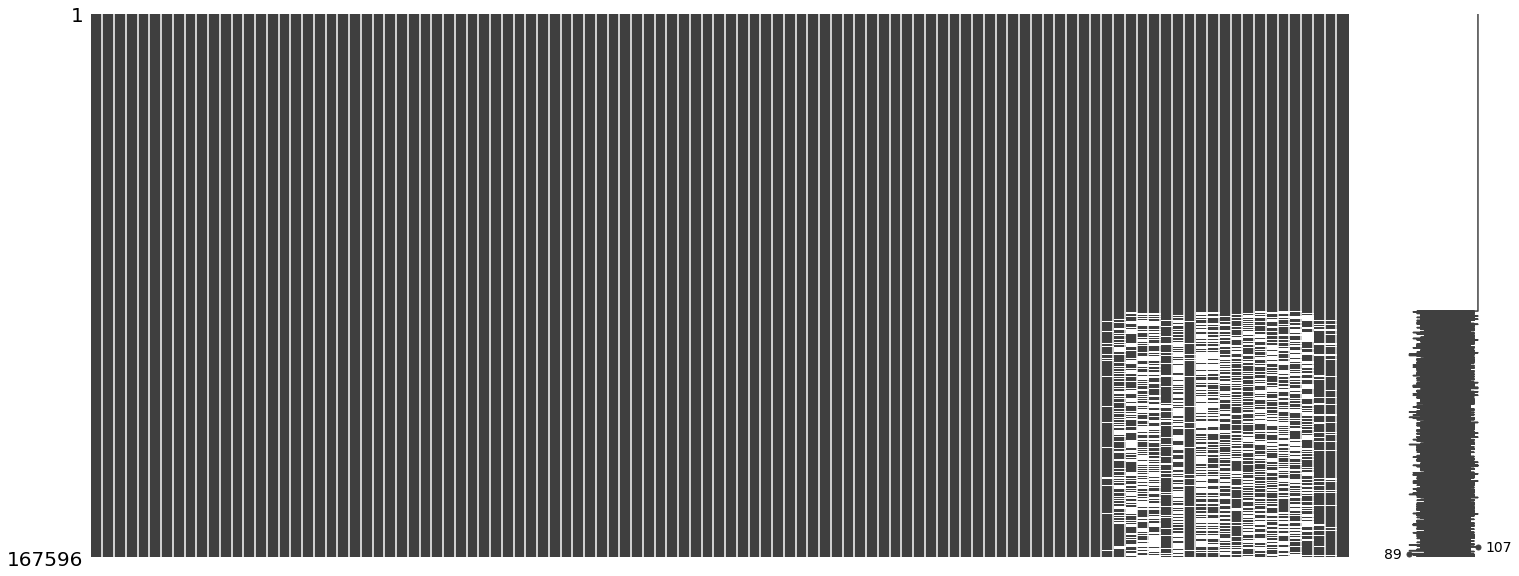

In [208]:
# Checking whether upsampling created any missing values in the dataset
msno.matrix(df);

In [209]:
# We will impute these missing values with mean/mode
df.isnull().columns

Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache', 'bun_apache',
       'creatinine_apache',
       ...
       'd1_spo2_max', 'd1_spo2_min', 'd1_temp_min', 'h1_spo2_max',
       'h1_spo2_min', 'h1_temp_min', 'd1_sodium_min',
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
       'hospital_death'],
      dtype='object', length=107)

In [210]:
# imputing missing values with mean and mode
for col in df:
    if df[col].dtypes in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [211]:
# Saving dataframe
import joblib
joblib.dump(df, 'data_after_smote.sav')

['data_after_smote.sav']